In [199]:
#importing the libraries

import re
import string
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from time import time, sleep
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import numpy as np
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
try:
    nlp = spacy.load("en_core_web_sm")
except:
    import en_core_web_sm
    nlp = en_core_web_sm.load()

In [200]:
#importing the data
AppleTweets = pd.read_csv('data/AppleTweets.csv')
SamsungTweets = pd.read_csv('data/SamsungTweets.csv')
HuaweiTweets = pd.read_csv('data/HuaweiTweets.csv')

In [201]:
#looking into the number of rows and columns of each dataset
print(AppleTweets.shape,SamsungTweets.shape,HuaweiTweets.shape)

(15573, 22) (14841, 21) (14724, 21)


In [202]:
#dropping the unwanted columns
AppleTweets.drop(AppleTweets.columns[AppleTweets.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
AppleTweets.drop(["screen_name", "username","user_id","tweet_id","tweet_url","timestamp_epochs",
                 "text_html","links","has_media","img_urls","video_url",
                 "is_replied","is_reply_to","parent_tweet_id","reply_to_users"], axis = 1, inplace = True) 

SamsungTweets.drop(SamsungTweets.columns[SamsungTweets.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
SamsungTweets.drop(["screen_name", "username","user_id","tweet_id","tweet_url","timestamp_epochs",
                 "text_html","links","has_media","img_urls","video_url",
                 "is_replied","is_reply_to","parent_tweet_id","reply_to_users"], axis = 1, inplace = True) 

HuaweiTweets.drop(HuaweiTweets.columns[HuaweiTweets.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
HuaweiTweets.drop(["screen_name", "username","user_id","tweet_id","tweet_url","timestamp_epochs",
                 "text_html","links","has_media","img_urls","video_url",
                 "is_replied","is_reply_to","parent_tweet_id","reply_to_users"], axis = 1, inplace = True) 

print(AppleTweets.shape,SamsungTweets.shape,HuaweiTweets.shape)

(15573, 6) (14841, 6) (14724, 6)


In [203]:
#creating new columns with the name of the each company
AppleTweets['company'] = 'Apple'
SamsungTweets['company'] = 'Samsung'
HuaweiTweets['company'] = 'Huawei' 
#combaning the datasets
Data = AppleTweets.append([SamsungTweets,HuaweiTweets])
Data.reset_index(inplace=True, drop=True)
Data.shape

(45138, 7)

In [204]:
#creating a new copy of the dataset
data = Data.copy()
data.head(10)

timestamp                                               text  \
0  2019-12-25 23:59:50  ...Thank You! Just a bummer cause he’s had Fit...   
1  2019-12-25 23:59:23  @Apple  Thanks for the quality products you so...   
2  2019-12-25 23:57:25  My @Apple AirPods only worked for 18 months. J...   
3  2019-12-25 23:56:09  What I get all the time on iOS13 is this. Star...   
4  2019-12-25 23:56:04  @Apple @AppleSupport Why has it taken over 5 h...   
5  2019-12-25 23:55:00                                                NaN   
6  2019-12-25 23:53:41  @Apple Why can't I stream audio from my iPhone...   
7  2019-12-25 23:53:31  Gotta know why @Apple needs to track and save ...   
8  2019-12-25 23:52:41                              Opooo HAHAHAHAHAHAHAG   
9  2019-12-25 23:52:22                                       masaya ka?     

  hashtags  likes  retweets  replies company  
0       []      1         0        1   Apple  
1       []      0         0        0   Apple  
2       []      0         0        0   Apple  
3       []      1         0        0   Apple  
4       []      0         0        1   Apple  
5       []      1         0        0   Apple  
6       []      0         0        0   Apple  
7       []      0         0        0   Apple  
8       []      1         0        1   Apple  
9       []      1         0        1   Apple

In [205]:
#Dropping the rows which have empty text
data.drop(index=data.loc[data['text'].isnull()].index, inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

(44739, 7)

In [206]:
# dropping ALL duplicte values 
data.drop_duplicates(subset ="text", 
                     keep = False, inplace = True)
data.reset_index(inplace=True, drop=True)
data.shape

(39730, 7)

In [207]:
#removing non english words
words = set(nltk.corpus.words.words())
for i in data.index:
    data['text'][i] =  " ".join(w for w in nltk.wordpunct_tokenize(data['text'][i]) if w.lower() in words or not w.isalpha())
    
data.head()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


timestamp                                               text  \
0  2019-12-25 23:45:56  Does anyone seriously believe that the @ Apple...   
1  2019-12-25 23:45:50  My phone itself last night and now half my hav...   
2  2019-12-25 23:44:51  Dear @ Apple , I never thought that I ' d say ...   
3  2019-12-25 23:42:55                           See needs a new season !   
4  2019-12-25 23:42:53                           @ Apple ya di con el SE2   

  hashtags  likes  retweets  replies company  
0       []      1         0        0   Apple  
1       []      0         0        1   Apple  
2       []      0         0        0   Apple  
3       []      0         0        0   Apple  
4       []      0         0        0   Apple

In [208]:
# Convert string to list for hashtag column
hashtag_remove_map = dict((x, ' ') for x in ["[", "]", "'", ","])
trantab = str.maketrans(hashtag_remove_map)
temp_hashtag_list = data['hashtags'].values
for i in data.index:
    temp = temp_hashtag_list[i].translate(trantab).split()
    if (len(temp)> 0):
        data['hashtags'][i] = temp
    else:
        data['hashtags'][i] = []

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [209]:
#Dropping the rows which have empty text
data.drop(index=data.loc[data['text'].isnull()].index, inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

(39730, 7)

In [210]:
# Apply first round of text cleaning techniques
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    #get rid of non english charectors
    text = re.sub("([^\x00-\x7F])+","",text)
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [211]:
# Let's take a look at the updated text
data['text'] = pd.DataFrame(data['text'].apply(round1))
data

timestamp                                               text  \
0      2019-12-25 23:45:56  does anyone seriously believe that the  apple ...   
1      2019-12-25 23:45:50  my phone itself last night and now half my hav...   
2      2019-12-25 23:44:51  dear  apple  i never thought that i  d say thi...   
3      2019-12-25 23:42:55                            see needs a new season    
4      2019-12-25 23:42:53                                apple ya di con el    
...                    ...                                                ...   
39725  2019-12-18 05:59:15   type c          pro  surface go  galaxy tab  ...   
39726  2019-12-18 01:33:06                            d                         
39727  2019-12-17 23:47:06  i just write and consume some content  i am th...   
39728  2019-12-17 23:12:26                                              x pro   
39729  2019-12-17 22:23:51  i advise  i got a   a year ago and i  m so hap...   

      hashtags  likes  retweets  replies company  
0           []      1         0        0   Apple  
1           []      0         0        1   Apple  
2           []      0         0        0   Apple  
3           []      0         0        0   Apple  
4           []      0         0        0   Apple  
...        ...    ...       ...      ...     ...  
39725       []      0         0        0  Huawei  
39726       []      0         0        0  Huawei  
39727       []      0         0        1  Huawei  
39728       []      0         0        2  Huawei  
39729       []      1         0        0  Huawei  

[39730 rows x 7 columns]

In [212]:
# Applying the second round of text cleaning, Removing punctuations, special characters and numbers
data['text'] = data['text'].str.replace("[^a-zA-Z#]", " ") 
data.shape

(39730, 7)

In [213]:
#Replacing the empty texts with numpy nan and removing them
data['text'].replace('', np.nan, inplace=True)
data.dropna(subset=['text'], inplace=True)
#reseting the database index
data.reset_index(inplace=True, drop=True)
data.shape

(38021, 7)

In [214]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#tokenizing and removing stop words
stop_words = set(stopwords.words('english')) 
for i in data.index:
    word_tokens = word_tokenize(data['text'][i])
    data['text'][i] = [w for w in word_tokens if not w in stop_words] 
    
data.head()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


timestamp                                               text  \
0  2019-12-25 23:45:56  [anyone, seriously, believe, apple, timcook, c...   
1  2019-12-25 23:45:50     [phone, last, night, half, phone, apple, hell]   
2  2019-12-25 23:44:51  [dear, apple, never, thought, say, miss, apple...   
3  2019-12-25 23:42:55                          [see, needs, new, season]   
4  2019-12-25 23:42:53                           [apple, ya, di, con, el]   

  hashtags  likes  retweets  replies company  
0       []      1         0        0   Apple  
1       []      0         0        1   Apple  
2       []      0         0        0   Apple  
3       []      0         0        0   Apple  
4       []      0         0        0   Apple

In [215]:
#  using nltk WordNetLemmatizer function to normalize the tweets
# Text Normalization -reducing terms to their base word(like runs, run, running, ran to base word run)
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])


for i in range(len(data['text'])):
    data['text'][i] = ' '.join(data['text'][i])    

data.head()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


timestamp                                               text  \
0  2019-12-25 23:45:56  anyone seriously believe apple timcook capable...   
1  2019-12-25 23:45:50             phone last night half phone apple hell   
2  2019-12-25 23:44:51  dear apple never thought say miss apple piece ...   
3  2019-12-25 23:42:55                                see need new season   
4  2019-12-25 23:42:53                                 apple ya di con el   

  hashtags  likes  retweets  replies company  
0       []      1         0        0   Apple  
1       []      0         0        1   Apple  
2       []      0         0        0   Apple  
3       []      0         0        0   Apple  
4       []      0         0        0   Apple

In [216]:
from collections import Counter 
  
def remove_duplicates(input): 
  
    # split input string separated by space 
    input = input.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(input)): 
        input[i] = "".join(input[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(input) 
  
    # joins two adjacent elements in iterable way 
    s = " ".join(UniqW.keys()) 
    return s

In [217]:
# remove_duplicates
data['text'] = pd.DataFrame(data['text'].apply(remove_duplicates))

In [218]:
# Removing short words less than length 3 since they are meaningless in the context
data['text'] = data['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data

timestamp                                               text  \
0      2019-12-25 23:45:56  anyone seriously believe apple timcook capable...   
1      2019-12-25 23:45:50                   phone last night half apple hell   
2      2019-12-25 23:44:51        dear apple never thought miss piece garbage   
3      2019-12-25 23:42:55                                        need season   
4      2019-12-25 23:42:53                                              apple   
...                    ...                                                ...   
38016  2019-12-18 05:59:15                                type surface galaxy   
38017  2019-12-18 01:33:06                                                      
38018  2019-12-17 23:47:06  write consume content thinking love think futu...   
38019  2019-12-17 23:12:26                                                      
38020  2019-12-17 22:23:51  advise year happy powerful light always opinio...   

      hashtags  likes  retweets  replies company  
0           []      1         0        0   Apple  
1           []      0         0        1   Apple  
2           []      0         0        0   Apple  
3           []      0         0        0   Apple  
4           []      0         0        0   Apple  
...        ...    ...       ...      ...     ...  
38016       []      0         0        0  Huawei  
38017       []      0         0        0  Huawei  
38018       []      0         0        1  Huawei  
38019       []      0         0        2  Huawei  
38020       []      1         0        0  Huawei  

[38021 rows x 7 columns]

In [219]:
#create a new row for tokens
data['tokenizedWords'] = data['text'].apply(lambda x: x.split())

In [220]:
# count the number of words in each doc
word_count_list = np.zeros(data.shape[0], dtype=np.int)
doc_list = data['text'].values
for i in data.index:
    word_count_list[i] = len(doc_list[i].split())

# add the word count as a new column
data['word_count'] = word_count_list

data.head()

timestamp                                               text  \
0  2019-12-25 23:45:56  anyone seriously believe apple timcook capable...   
1  2019-12-25 23:45:50                   phone last night half apple hell   
2  2019-12-25 23:44:51        dear apple never thought miss piece garbage   
3  2019-12-25 23:42:55                                        need season   
4  2019-12-25 23:42:53                                              apple   

  hashtags  likes  retweets  replies company  \
0       []      1         0        0   Apple   
1       []      0         0        1   Apple   
2       []      0         0        0   Apple   
3       []      0         0        0   Apple   
4       []      0         0        0   Apple   

                                      tokenizedWords  word_count  
0  [anyone, seriously, believe, apple, timcook, c...          17  
1            [phone, last, night, half, apple, hell]           6  
2  [dear, apple, never, thought, miss, piece, gar...           7  
3                                     [need, season]           2  
4                                            [apple]           1

In [221]:
#removing the rows with 0 word
data = data[data.word_count != 0]
data.reset_index(inplace=True, drop=True)
data.shape

(34647, 9)

In [225]:
def hashtag_remover(df,tag):
    temp = []
    for ind, hashtags in enumerate(df.hashtags):
        if tag in hashtags:
            temp.append(ind)
    df.drop(index=temp,inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df.shape

In [226]:
#removing unrelated rows
hashtag_remover(data,'CarlotaNoEstasSola')


(34601, 9)

In [227]:
# make a new df to store hashtag results
columns=['text_index', 'hashtag', 'company']
data_hashtags = pd.DataFrame(columns=columns)
# convert df to array to improve loop time performance
hashtag_list = data['hashtags'].values
    
for i in data.index:
    # to improve loop time performance, convert integer to string
#     hashtag_list = hashtag_list[i].translate(trantab).split()
    temp = [[str(i), hashtag] for hashtag in hashtag_list[i]]
    temp_df = pd.DataFrame(temp, columns=columns[:-1])
    temp_df[columns[-1]] = data.loc[i, columns[-1]]
    # add 1 row for each hashtag result
    data_hashtags = data_hashtags.append(temp_df, ignore_index=True)
    
data_hashtags.head(2)

text_index hashtag company
0          9   ToTok   Apple
1         12     fbi   Apple

In [228]:
data_hashtags

text_index        hashtag company
0              9          ToTok   Apple
1             12            fbi   Apple
2             15   Entrepreneur   Apple
3             15        respect   Apple
4             29       iphone4s   Apple
...          ...            ...     ...
23960      34597        huawei9  Huawei
23961      34597  huaweipicture  Huawei
23962      34597      huaweipvf  Huawei
23963      34597  huaweip9leica  Huawei
23964      34597  huaweibestwei  Huawei

[23965 rows x 3 columns]

In [229]:
data_hashtags.to_csv('data/data_hashtags.csv', index=False)
data_hashtags = pd.read_csv('data/data_hashtags.csv')

In [230]:
data_hashtags['hashtag'] = pd.DataFrame(data_hashtags['hashtag'].apply(round1))
#Replacing the empty texts with numpy nan and removing them
data_hashtags['hashtag'].replace('', np.nan, inplace=True)
data_hashtags.dropna(subset=['hashtag'], inplace=True)

data_hashtags

text_index                hashtag company
0               9                  totok   Apple
1              12                    fbi   Apple
2              15           entrepreneur   Apple
3              15                respect   Apple
5              31  biggestdisappointment   Apple
...           ...                    ...     ...
23958       34597              huaweifit  Huawei
23959       34597            huaweitalia  Huawei
23961       34597          huaweipicture  Huawei
23962       34597              huaweipvf  Huawei
23964       34597          huaweibestwei  Huawei

[19851 rows x 3 columns]

In [231]:
# function to find the most frequent values in a column and their frequencies
from collections import Counter
def most_commons(df, cl_name, n=10):
    return pd.DataFrame(Counter(df[cl_name]).most_common(n), columns=[cl_name, 'frequency'])

# top most frequently mentioned named entities
most_commons(data_hashtags.loc[data_hashtags['company']=='Apple', ['hashtag']], 'hashtag', 50)

hashtag  frequency
0               apple        181
1              iphone        105
2              itunes         49
3                 ios         36
4          airpodspro         31
5        shotoniphone         27
6          applewatch         25
7               music         23
8          applemusic         20
9                ipad         20
10            airpods         19
11           catalina         19
12         macbookpro         17
13               tech         17
14         technology         16
15            spotify         16
16                mac         15
17              macos         15
18            android         15
19            macbook         15
20                pic         13
21            privacy         12
22             amazon         11
23               siri         11
24              china         11
25           applepic         11
26            iphones         11
27            navidad         10
28           appstore         10
29             macpro         10
30  standwithhongkong         10
31            samsung          9
32          applecard          9
33              emoji          9
34           phishing          9
35            podcast          9
36            appletv          9
37               nook          9
38          christmas          8
39     todosobremovil          8
40            ofertas          8
41     felizmiercoles          8
42            compras          8
43             chollo          8
44            ipadpro          8
45     themorningshow          8
46         disneyplus          8
47                ccp          8
48          stevejobs          7
49            carplay          7

In [232]:
# dict to map hashtag names with the same meaning
hashtag_name_map = {'Apple': 'apple', 
                   'apples': 'apple',
                    'Iphone': 'iPhone',
                    'iphones':'iPhone',
                    'airpodspro':'airpods',
                    'macbookpro':'macbook',
                    'mac':'macbook',
                    'catalina':'macos',
                    'macpro':'macbook',
                    'music':'applemusic',
                    'ipadpro':'ipad'
                  }

# map the hashtag names
for hashtag in hashtag_name_map.keys():
    data_hashtags.loc[data_hashtags['hashtag']==hashtag, 'hashtag'] = hashtag_name_map[hashtag]

# top most frequently mentioned named entities
most_commons(data_hashtags.loc[data_hashtags['company']=='Apple', ['hashtag']], 'hashtag', 20)

hashtag  frequency
0          apple        181
1         iphone        105
2        macbook         57
3        airpods         50
4         itunes         49
5     applemusic         43
6            ios         36
7          macos         34
8           ipad         28
9   shotoniphone         27
10    applewatch         25
11          tech         17
12    technology         16
13       spotify         16
14       android         15
15           pic         13
16       privacy         12
17        amazon         11
18          siri         11
19         china         11

In [233]:
# function to find the most frequent values in a column and their frequencies
def most_commons(df, cl_name, n=10):
    return pd.DataFrame(Counter(df[cl_name]).most_common(n), columns=[cl_name, 'frequency'])

# top most frequently mentioned named entities
most_commons(data_hashtags.loc[data_hashtags['company']=='Samsung', ['hashtag']], 'hashtag', 20)

hashtag  frequency
0         samsung        488
1       jollyjohn        254
2      galaxybuds        232
3      galaxynote        127
4          galaxy         96
5              ai         95
6         android         68
7            tech         68
8      technology         59
9   samsunggalaxy         52
10           tron         52
11     withgalaxy         45
12     galaxyfold         44
13     blockchain         44
14     smartphone         43
15           news         37
16     terrorists         34
17        airpods         34
18            ces         32
19      terrorism         31

In [234]:
# dict to map hashtag names with the same meaning
hashtag_name_map = {'samsunggalaxy': 'galaxy', 
                    'withgalaxy': 'galaxy'
                  }

# map the hashtag names
for hashtag in hashtag_name_map.keys():
    data_hashtags.loc[data_hashtags['hashtag']==hashtag, 'hashtag'] = hashtag_name_map[hashtag]

# top most frequently mentioned named entities
most_commons(data_hashtags.loc[data_hashtags['company']=='Samsung', ['hashtag']], 'hashtag', 20)

hashtag  frequency
0      samsung        488
1    jollyjohn        254
2   galaxybuds        232
3       galaxy        193
4   galaxynote        127
5           ai         95
6      android         68
7         tech         68
8   technology         59
9         tron         52
10  galaxyfold         44
11  blockchain         44
12  smartphone         43
13        news         37
14  terrorists         34
15     airpods         34
16         ces         32
17   terrorism         31
18      iphone         30
19   trademark         30

In [235]:
# function to find the most frequent values in a column and their frequencies
def most_commons(df, cl_name, n=10):
    return pd.DataFrame(Counter(df[cl_name]).most_common(n), columns=[cl_name, 'frequency'])

# top most frequently mentioned named entities
most_commons(data_hashtags.loc[data_hashtags['company']=='Huawei', ['hashtag']], 'hashtag', 20)

hashtag  frequency
0                  huawei        489
1                   china        123
2                      ai         90
3              technology         72
4                    tech         62
5                     iot         49
6                     ccp         48
7               websummit         45
8             trustintech         43
9           boycotthuawei         39
10           boycottchina         38
11                chinazi         35
12                     us         32
13                digital         31
14  digitaltransformation         31
15      huaweieunewshttps         31
16                  india         29
17                  cloud         29
18                bigdata         29
19          cybersecurity         28

In [236]:
# dict to map hashtag names with the same meaning
hashtag_name_map = {'tech': 'technology', 
                    'chinazi': 'china',
                    'trustintech': 'technology',
                    'boycottchina': 'boycotthuawei',
                    'digital': 'technology',
                    'digitaltransformation': 'IOT',
                    'iot': 'IOT',
                    'cloud': 'IOT'
                  }

# map the hashtag names
for hashtag in hashtag_name_map.keys():
    data_hashtags.loc[data_hashtags['hashtag']==hashtag, 'hashtag'] = hashtag_name_map[hashtag]

# top most frequently mentioned named entities
most_commons(data_hashtags.loc[data_hashtags['company']=='Huawei', ['hashtag']], 'hashtag', 20)

hashtag  frequency
0              huawei        489
1          technology        208
2               china        158
3                 IOT        109
4                  ai         90
5       boycotthuawei         77
6                 ccp         48
7           websummit         45
8                  us         32
9   huaweieunewshttps         31
10              india         29
11            bigdata         29
12      cybersecurity         28
13   chinaisterrorist         27
14         smartphone         27
15      huaweipartner         25
16  standwithhongkong         24
17       freehongkong         23
18            cdnpoli         22
19         innovation         21

In [237]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def barchart_hashtags(hashtags,title):
    
    temp_hash = hashtags.hashtag.tolist()
    temp_freq = hashtags.frequency.tolist()

    y_pos = np.arange(len(temp_hash))

    plt.barh(y_pos, temp_freq, align='center', alpha=0.5 , 
             color=['black', 'red', 'green', 'blue', 'cyan','magenta','yellow','Purple','orange','Brown'])
    plt.yticks(y_pos, temp_hash)
    plt.xlabel('count')
    plt.title(title)

    plt.show()
    
    

In [238]:
top_ten_Apple_hashtags = most_commons(data_hashtags.loc[data_hashtags['company']=='Apple', ['hashtag']], 'hashtag', 10)
top_ten_Samsung_hashtags = most_commons(data_hashtags.loc[data_hashtags['company']=='Samsung', ['hashtag']], 'hashtag', 10)
top_ten_huawei_hashtags = most_commons(data_hashtags.loc[data_hashtags['company']=='Huawei', ['hashtag']], 'hashtag', 10)

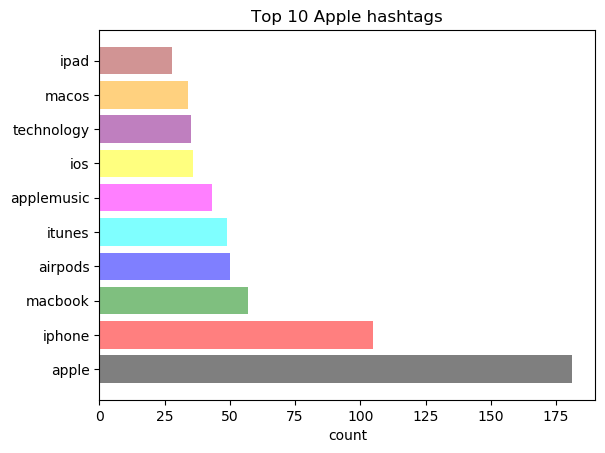

In [239]:
barchart_hashtags(top_ten_Apple_hashtags,'Top 10 Apple hashtags')

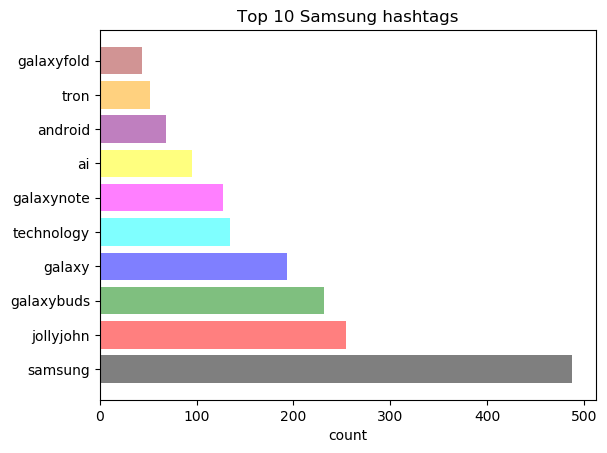

In [240]:
barchart_hashtags(top_ten_Samsung_hashtags,'Top 10 Samsung hashtags')

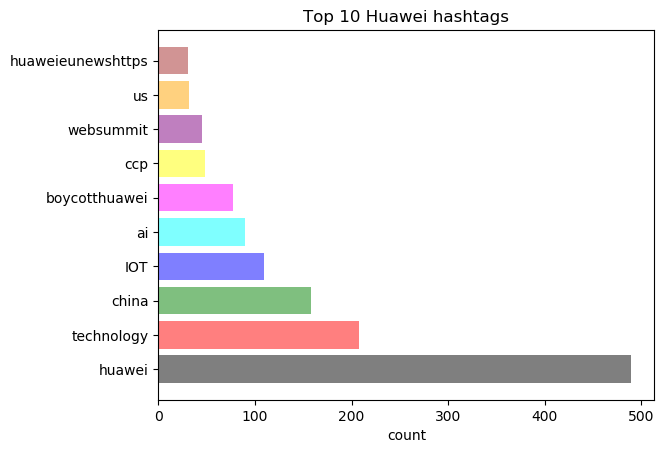

In [241]:
barchart_hashtags(top_ten_huawei_hashtags,'Top 10 Huawei hashtags')

In [242]:
# plot word cloud of a given text
def plot_word_cloud(words, colormap='bwr', title=None, width=1000, height=800):
    # set the stop words
    stopwords = set(STOPWORDS)
    Additional_stop_words = ['']
    for s in  Additional_stop_words:
        stopwords.add(s)

    # generate WordCloud
    if type(words)==str:
        wc = WordCloud(background_color="white", stopwords=stopwords, 
                       width=width, height=height, colormap=colormap).generate(words)
    # for simplicity, I assume that if words is not an string, it is a dictionary of word frequencies
    else:
        wc = WordCloud(background_color="white", stopwords=stopwords, 
                       width=width, height=height, colormap=colormap).generate_from_frequencies(words)

    # show the WordCloud
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=25, y=1.01)


# plot three word cloud, one for each company
def plot_three_word_clouds(df, title=None, method='str',**kwargs):
    my_color_map = ['Greens','Blues', 'Reds']
    plt.figure(figsize=(20, 10))
    for i, p in enumerate(['Apple', 'Samsung', 'Huawei']):
        if method=='str':
            words = (' '.join(df.loc[df['company']==p, 'text'])).lower()
        # for simplicity, I assume that if not string, the method is word frequency
        else:
            words = Counter(df.loc[df['company']==p, 'entity'])
            
        plt.subplot(1, 3, i+1)
        plot_word_cloud(words, my_color_map[i], title=p, **kwargs)

    if title:
        plt.suptitle(title, fontsize=35, y=0.9)
    
    plt.subplots_adjust(wspace=0.1)
    plt.show()

In [243]:
# plot three word cloud, one for each company
def plot_three_word_clouds_hashtags(df, title=None, method='str',**kwargs):
    my_color_map = ['Greens','Blues', 'Reds']
    plt.figure(figsize=(20, 10))
    for i, p in enumerate(['Apple', 'Samsung', 'Huawei']):
        if method=='str':
            words = (' '.join(df.loc[df['company']==p, 'hashtag'])).lower()
        # for simplicity, I assume that if not string, the method is word frequency
        else:
            words = Counter(df.loc[df['company']==p, 'entity'])
            
        plt.subplot(1, 3, i+1)
        plot_word_cloud(words, my_color_map[i], title=p, **kwargs)

    if title:
        plt.suptitle(title, fontsize=35, y=0.9)
    
    plt.subplots_adjust(wspace=0.1)
    plt.show()

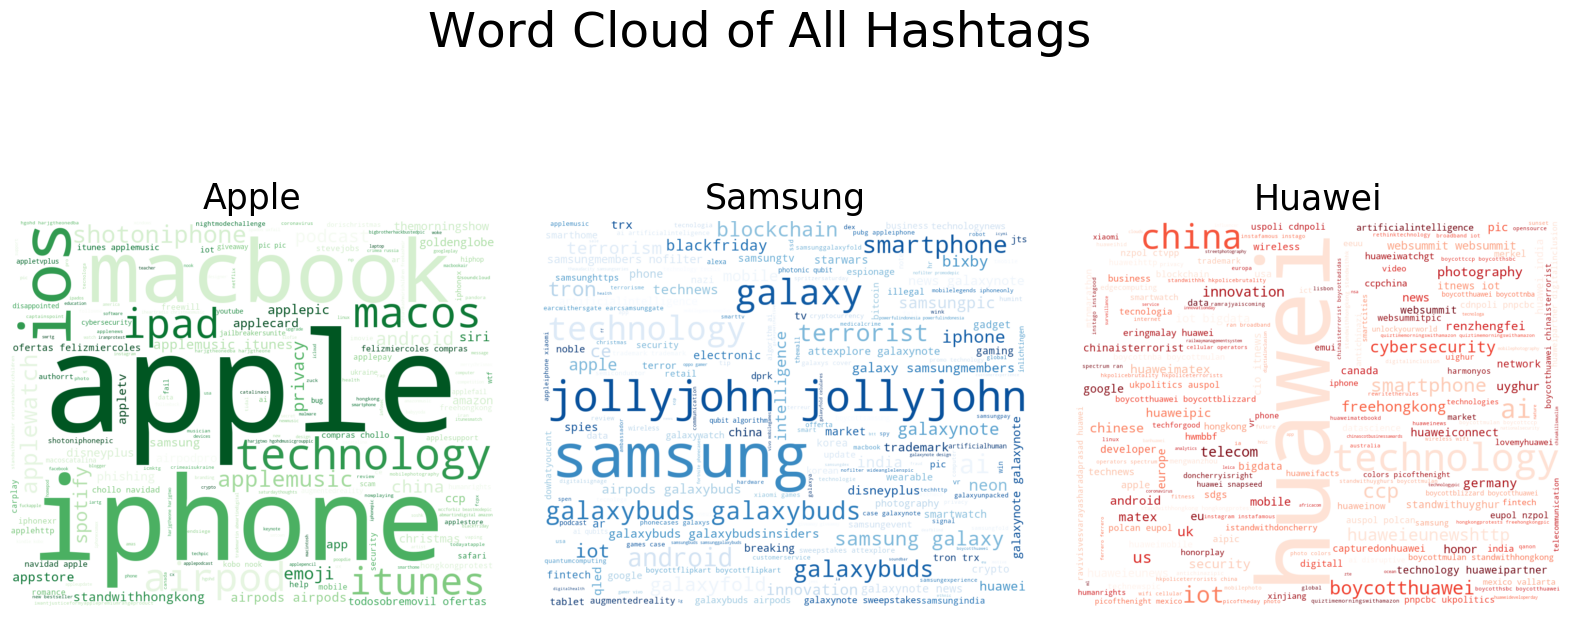

In [244]:
plot_three_word_clouds_hashtags(data_hashtags,'Word Cloud of All Hashtags')

In [47]:
import json

# a_file = open("emotions_map.txt", "w")
# json.dump(emotions_map, a_file)
# a_file.close()
# a_file = open("emotions_map.txt", "r")
with open("emotions_map.txt") as f:
    emotions_map = json.load(f)

In [48]:
# # make a new df to store emotions results
# columns=['text_index', 'emotion', 'company']
# data_emotions = pd.DataFrame(columns=columns)
# # convert df to array to improve loop time performance
# tokenized_lists = data['tokenizedWords'].values
# # for every sentence, run NER and store the result
# for i in data.index:
#     # to improve loop time performance, convert integer to string
#     temp = [[str(i), emotions_map[word]] for word in tokenized_lists[i] if word in emotions_map.keys()]
#     temp_df = pd.DataFrame(temp, columns=columns[:-1])
#     temp_df[columns[-1]] = data.loc[i, columns[-1]]
#     # add 1 row for each NER result
#     data_emotions = data_emotions.append(temp_df, ignore_index=True)

In [ ]:
# make a new df to store emotions results
columns=['text_index', 'emotion', 'company']
data_emotions = pd.DataFrame(columns=columns)
# convert df to array to improve loop time performance
tokenized_lists = data['tokenizedWords'].values
# for every sentence, run NER and store the result
for i in data.index:
    # to improve loop time performance, convert integer to string
    temp = [[str(i), emotions_map[word]] for word in tokenized_lists[i] if word in emotions_map.values()]
    temp_df = pd.DataFrame(temp, columns=columns[:-1])
    temp_df[columns[-1]] = data.loc[i, columns[-1]]
    # add 1 row for each NER result
    data_emotions = data_emotions.append(temp_df, ignore_index=True)

In [192]:
for word in tokenized_lists:
    if word in emotions_map.keys():
        print(emotions_map.keys())

In [191]:
word = 'anyone'

In [195]:
tokenized_lists[0][0]

'['

In [174]:
#importing NRC emotion lexicons
import joblib
emotion_lexicons = joblib.load( 'emotion_lexicons_dict.pkl')

In [175]:
emotion_lexicons

{'positive': ['abba',
  'ability',
  'abovementioned',
  'absolute',
  'absolution',
  'absorbed',
  'abundance',
  'abundant',
  'academic',
  'academy',
  'acceptable',
  'acceptance',
  'accessible',
  'accolade',
  'accommodation',
  'accompaniment',
  'accomplish',
  'accomplished',
  'accomplishment',
  'accord',
  'accountability',
  'accountable',
  'accredited',
  'accueil',
  'accurate',
  'ace',
  'achieve',
  'achievement',
  'acknowledgment',
  'acquire',
  'acquiring',
  'acrobat',
  'action',
  'actual',
  'acuity',
  'acumen',
  'adapt',
  'adaptable',
  'addresses',
  'adept',
  'adequacy',
  'adjunct',
  'admirable',
  'admiral',
  'admiration',
  'admire',
  'admirer',
  'admissible',
  'adorable',
  'adoration',
  'adore',
  'advance',
  'advanced',
  'advancement',
  'advantage',
  'advantageous',
  'advent',
  'adventure',
  'adventurous',
  'advisable',
  'advise',
  'adviser',
  'advocacy',
  'aesthetic',
  'aesthetics',
  'affable',
  'affection',
  'affiliated

In [49]:
data_emotions.to_csv('data/data_emotions.csv', index=False)
data_emotions = pd.read_csv('data/data_emotions.csv')
data_emotions

text_index   emotion company
0              0  adequate   Apple
1              7     happy   Apple
2             12     happy   Apple
3             12     happy   Apple
4             15  attached   Apple
...          ...       ...     ...
3838       34440     happy  Huawei
3839       34483       sad  Huawei
3840       34546       sad  Huawei
3841       34600     happy  Huawei
3842       34600     happy  Huawei

[3843 rows x 3 columns]

In [50]:
data_emotions[['company','emotion']].count()

company    3843
emotion    3843
dtype: int64

In [51]:
def emotions_piechart(df,label):
    temp_label = df.emotion.tolist()
    plt.figure(figsize=(25, 8))
    # plt.subplot(1, 3, i+1)
    plt.pie(df['frequency'],
            explode=[0.03, 0.03, 0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03],
            labels=temp_label,
    #         colors=['#daf202', '#09e355', '#95bdb5' ,'#8288ed','#38BF6F','#38BF6F','#38BF6F','#38BF6F','#38BF6F','#38BF6F'],
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 15})
    plt.axis('equal')
    plt.title(label, fontsize=20, y=1)

#     if title:
#         plt.suptitle(title, fontsize=25, y=0.96)

#     plt.subplots_adjust(wspace=0.2)
    plt.show()


In [52]:
top_10_emotions = most_commons(data_emotions,'emotion',10)
top_10_apple_emotions = most_commons(data_emotions.loc[data_emotions.company == "Apple"],'emotion',10)
top_10_samsung_emotions = most_commons(data_emotions.loc[data_emotions.company == "Samsung"],'emotion',10)
top_10_huawei_emotions = most_commons(data_emotions.loc[data_emotions.company == "Huawei"],'emotion',10)

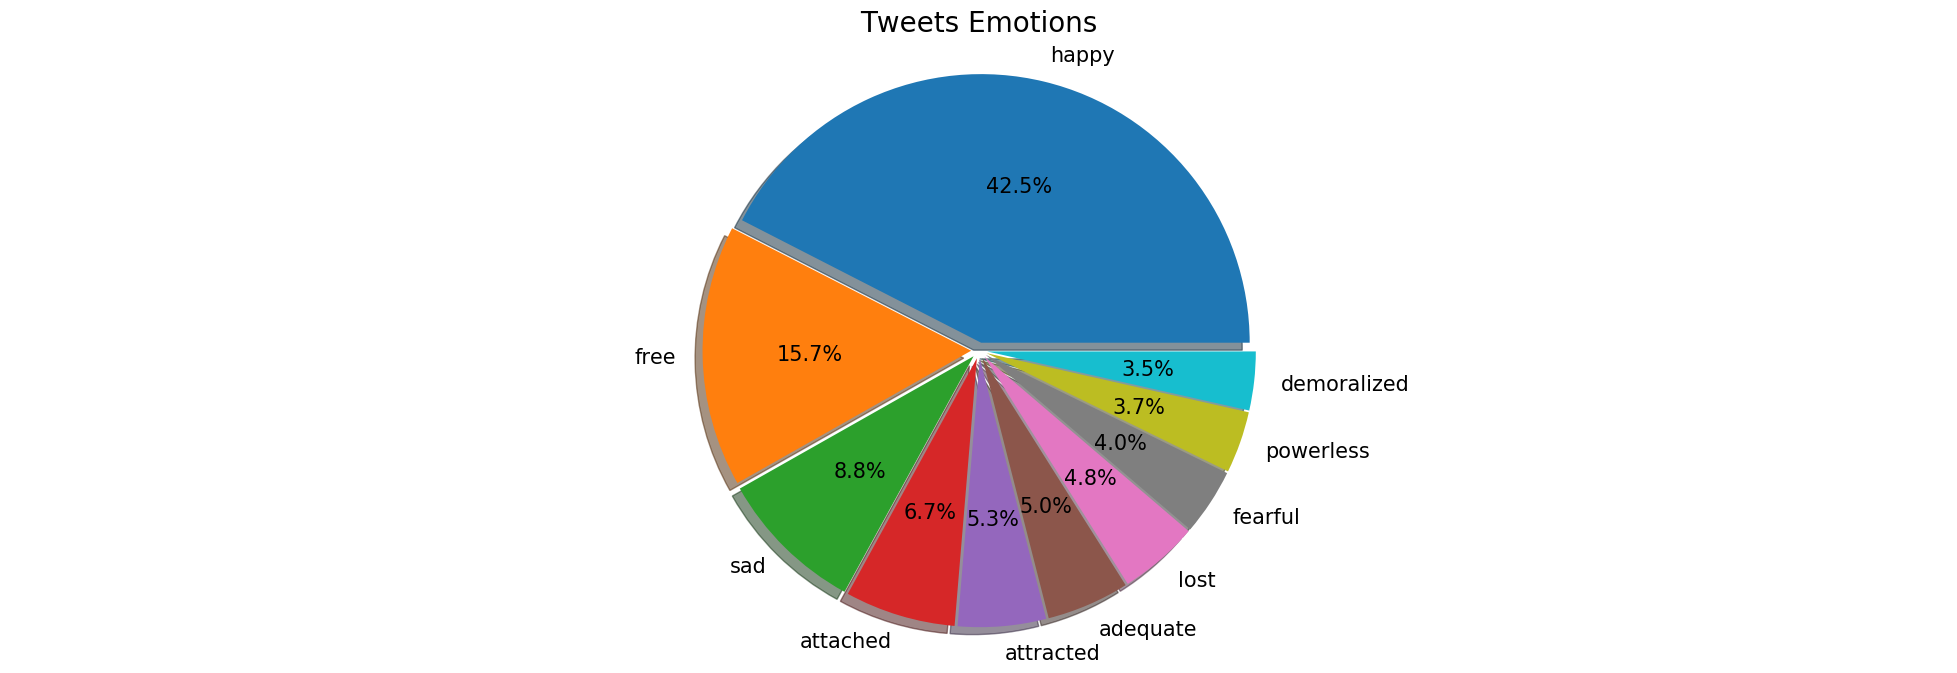

In [53]:
emotions_piechart(top_10_emotions,'Tweets Emotions')

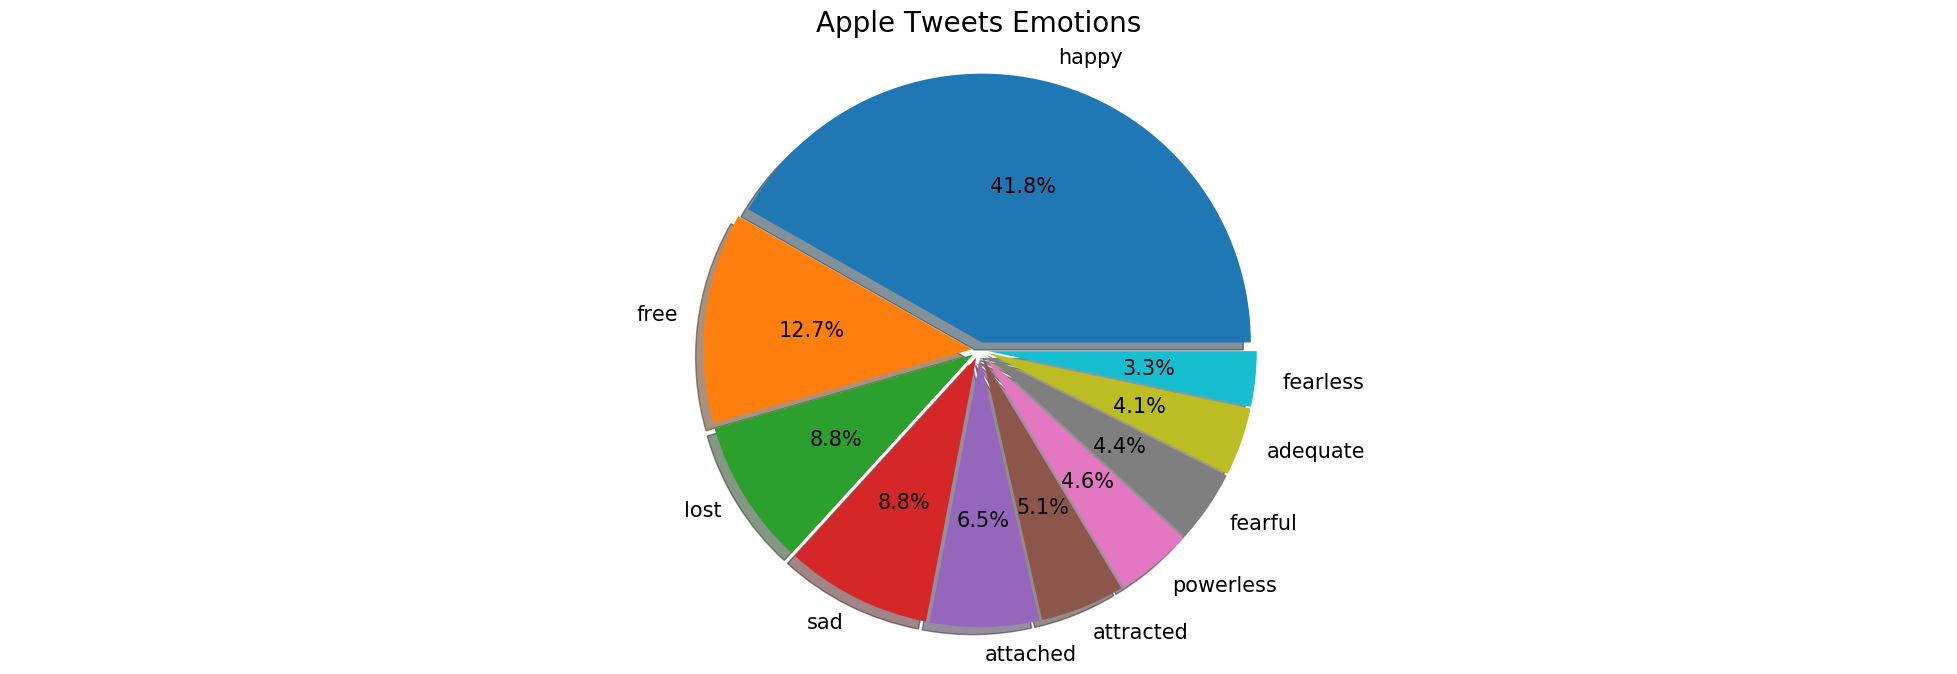

In [54]:
emotions_piechart(top_10_apple_emotions,'Apple Tweets Emotions')


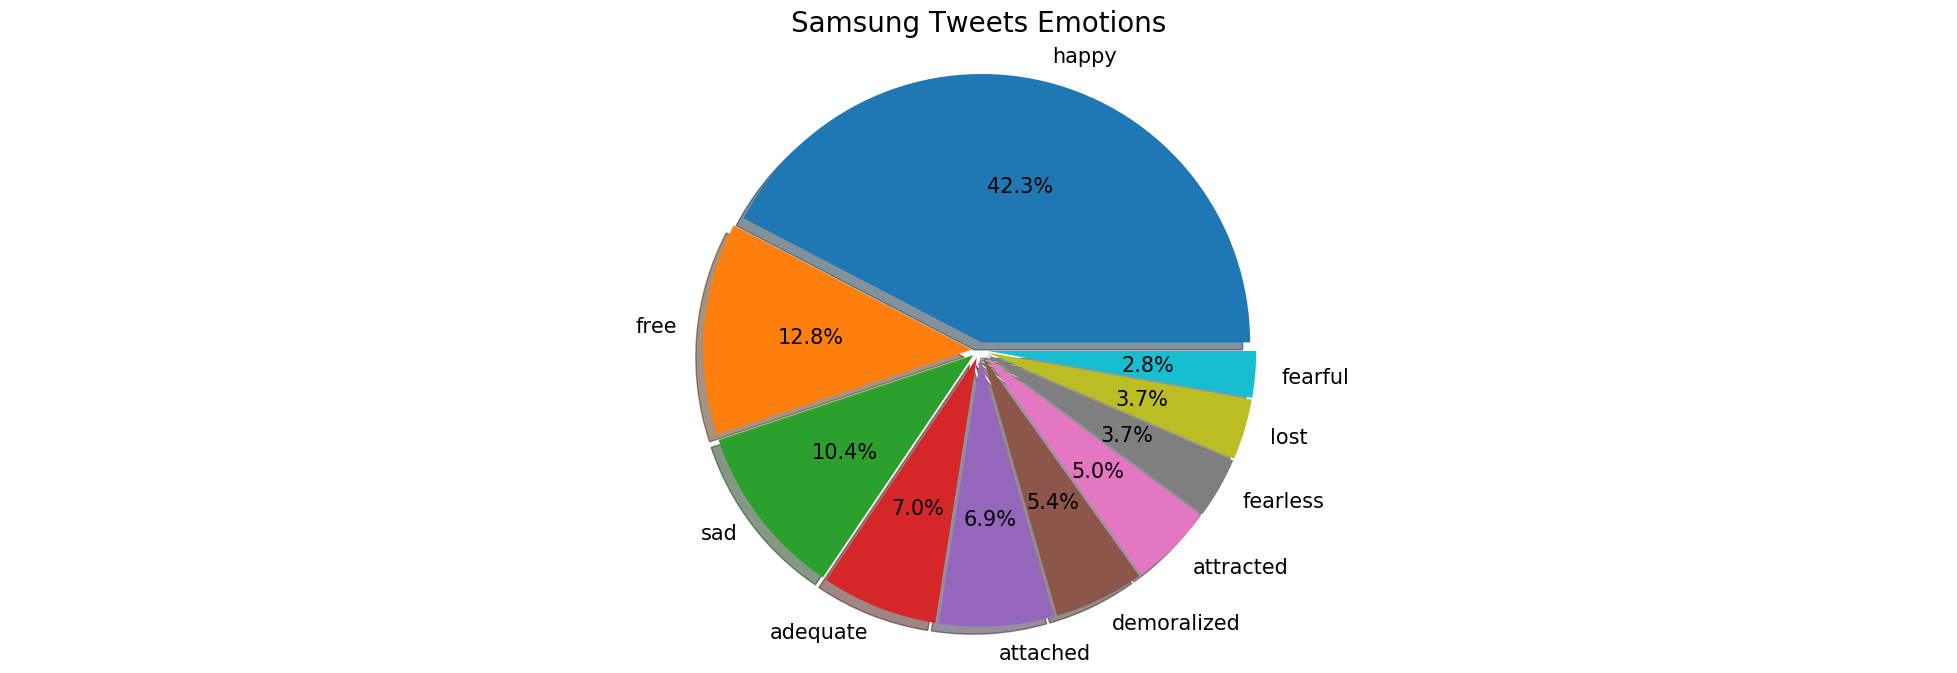

In [55]:
emotions_piechart(top_10_samsung_emotions,'Samsung Tweets Emotions')

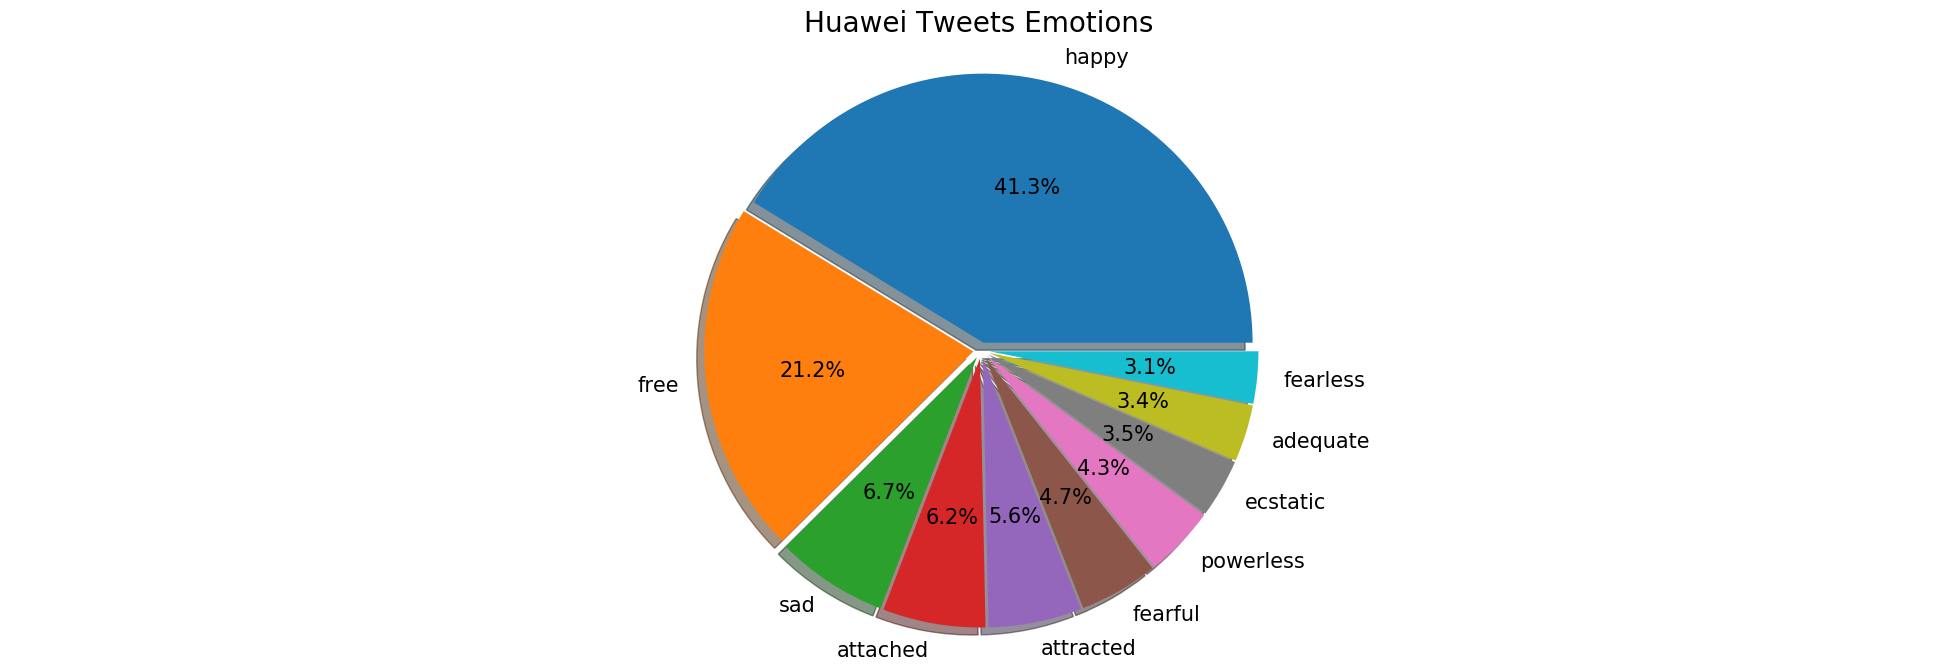

In [56]:
emotions_piechart(top_10_huawei_emotions,'Huawei Tweets Emotions')

In [57]:
# function to find the most frequent values in a column and their frequencies
from collections import Counter
def most_commons(df, cl_name, n=10):
    return pd.DataFrame(Counter(df[cl_name]).most_common(n), columns=[cl_name, 'frequency'])

# top most frequently mentioned named entities
most_commons(data_hashtags.loc[data_hashtags['company']=='Apple', ['hashtag']], 'hashtag', 50)

hashtag  frequency
0               apple        181
1              iphone        105
2             macbook         57
3             airpods         50
4              itunes         49
5          applemusic         43
6                 ios         36
7          technology         35
8               macos         34
9                ipad         28
10       shotoniphone         27
11         applewatch         25
12            spotify         16
13            android         15
14              china         13
15                pic         13
16            privacy         12
17             amazon         11
18               siri         11
19           applepic         11
20             iPhone         11
21            navidad         10
22           appstore         10
23  standwithhongkong         10
24            samsung          9
25          applecard          9
26              emoji          9
27           phishing          9
28            podcast          9
29            appletv          9
30               nook          9
31          christmas          8
32     todosobremovil          8
33            ofertas          8
34     felizmiercoles          8
35            compras          8
36             chollo          8
37     themorningshow          8
38         disneyplus          8
39                ccp          8
40          stevejobs          7
41            carplay          7
42             mobile          7
43             safari          7
44           security          7
45           iphonexr          7
46              hgohd          7
47           applepay          7
48                IOT          7
49               help          7

In [58]:
NumaricData = data.groupby('company')[['likes', 'retweets', 'replies']].sum()
NumaricData['company'] = NumaricData.index
NumaricData

likes  retweets  replies  company
company                                   
Apple    93511     21787     5931    Apple
Huawei   71446     13663     4847   Huawei
Samsung  87082     12145     6006  Samsung

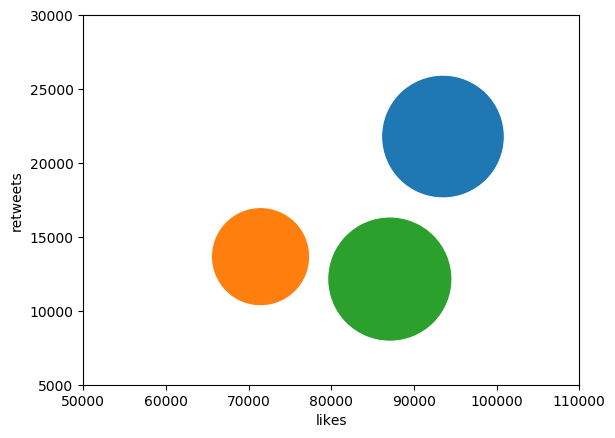

In [59]:
ax = sns.scatterplot(x="likes", y="retweets",
                     hue="company", 
                     size="replies",
                     sizes=(5000, 8000),
                     data=NumaricData)
plt.xlim([50000,110000])
plt.ylim([5000,30000])
plt.legend().set_visible(False)

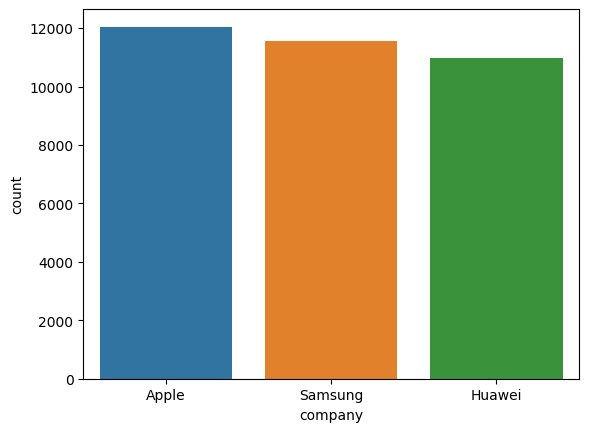

In [60]:
sns.countplot(x= 'company',data = data)

In [61]:
# plot the lenght of tweets given by each user for each company
def plot_word_counts(df, category='company', title=None, figsize=(12,6), suptitle_y=0.95): 
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    plt.suptitle(title, fontsize=20, y=suptitle_y)

    # dictionary to map colors to each company
    my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 

    # violin plot to show the distribution of the word count
    sns.violinplot(x="word_count", y=category,
                   data=df, split=True, palette=my_palette, ax=axs[0])
    axs[0].legend().set_visible(False)
    axs[0].set_ylabel('')

    # bar plot to show the average word count
    sns.barplot(x="word_count", y=category, 
                   data=df, palette=my_palette, ax=axs[1])
    axs[1].set_yticks([])
    axs[1].set_ylabel('')
    axs[1].set_xlabel('mean_word_count')

    plt.subplots_adjust(wspace=0.05)
    plt.show()

No handles with labels found to put in legend.


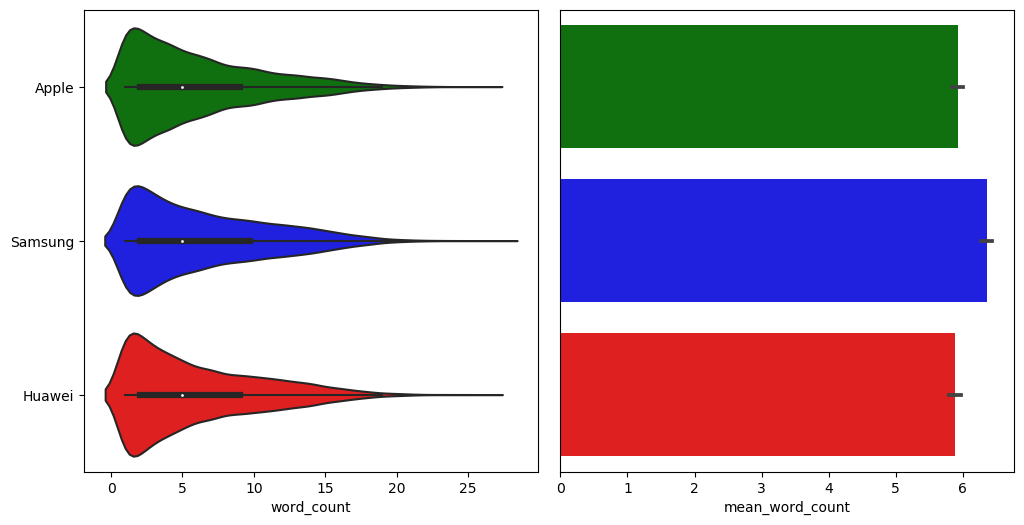

In [62]:
plot_word_counts(data)

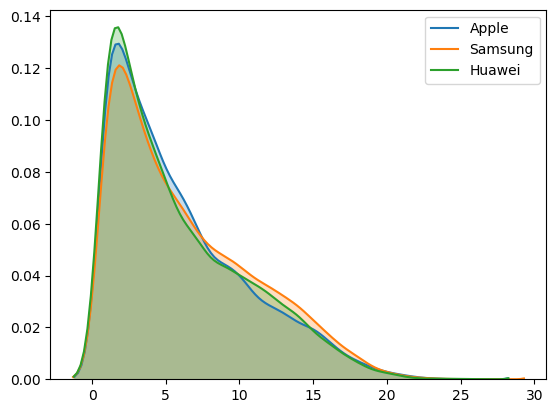

In [63]:
x = data.loc[data['company']=='Apple', 'word_count']
y = data.loc[data['company']=='Samsung', 'word_count']
z = data.loc[data['company']=='Huawei', 'word_count']
sns.kdeplot(x,shade= True,label='Apple')
sns.kdeplot(y,shade= True,label='Samsung')
sns.kdeplot(z,shade= True,label='Huawei')
plt.legend();

In [64]:
x

0        17
1         6
2         7
3         2
4         1
         ..
12041    12
12042     4
12043     1
12044     6
12045     1
Name: word_count, Length: 12046, dtype: int32

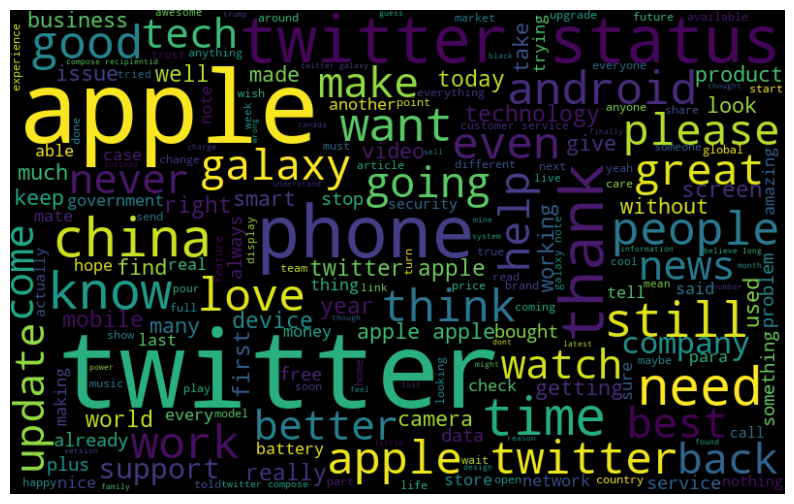

In [65]:
all_words = ' '.join([text for text in data['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

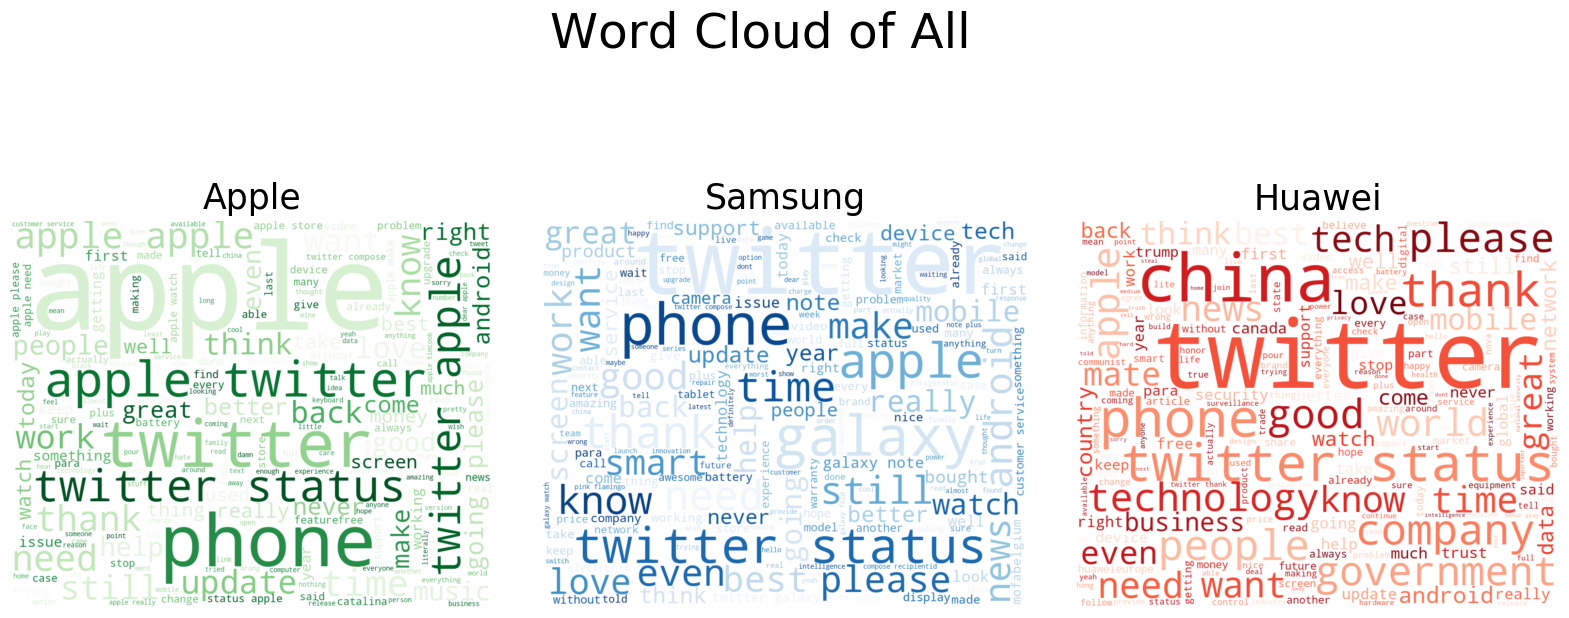

In [66]:
plot_three_word_clouds(data, 'Word Cloud of All')

In [67]:
def isNotNull(value):
    return value is not None and len(value)>0

In [68]:
# Importing binglu words
bing_dict_pos = []
bing_dict_neg = []
f = open('negative-words.txt','r')
for line in f:
    t= line.strip().lower();
    if (isNotNull(t)):
        bing_dict_neg.append(t)
f.close()

f = open('positive-words.txt','r')
for line in f:
    t = line.strip().lower();
    if (isNotNull(t)):
        bing_dict_pos.append(t)
f.close()

In [69]:
from nltk import word_tokenize

def sentiment_bingliu(text):
    sentiment = []
    tokens = nltk.word_tokenize(text)
    pos_cnt = 0
    neg_cnt = 0
    for token in bing_dict_neg:
        if (token in tokens):
            neg_cnt = neg_cnt +1
    for token in bing_dict_pos:
        if (token in tokens):
            pos_cnt = pos_cnt +1
    sentiment.append(pos_cnt - neg_cnt) 
    
    if sentiment[0] == 0:
        return 0
    if sentiment[0] > 0:
        return 1
    if sentiment[0] < 0:
        return -1

In [70]:
data['bingliuSentiment'] =data['text']
for i in range(len(data['text'])):
    data['bingliuSentiment'][i] = sentiment_bingliu(data['text'][i])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
from nltk.corpus import sentiwordnet as swn
# nltk.download('sentiwordnet')
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

def penn_to_wn(tag):
# Convert between the PennTreebank tags to simple Wordnet tags
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [72]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
# nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def sentiment_sentiwordnet(text):
#     text = text.decode("utf-8")
    raw_sentences = sent_tokenize(text)
    sentiment = 0
    tokens_count = 0

    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))

        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue

            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue

            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue

            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            word_sent = swn_synset.pos_score() - swn_synset.neg_score()

            if word_sent != 0:
                sentiment += word_sent
                tokens_count += 1

    if tokens_count == 0:
        return 0
    sentiment = sentiment/tokens_count
    if sentiment >= 0.01:
        return 1
    if sentiment <= -0.01:
        return -1
    return 0

In [73]:
import nltk
# nltk.download('averaged_perceptron_tagger')

data['WordNetSentiment'] =data['text']
for i in range(len(data['text'])):
    data['WordNetSentiment'][i] = sentiment_sentiwordnet(data['text'][i])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

data['AfinnSentiment'] =data['text']
for i in range(len(data['text'])):
    data['AfinnSentiment'][i] = af.score(data['text'][i])
    
data

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


timestamp                                               text  \
0      2019-12-25 23:45:56  anyone seriously believe apple timcook capable...   
1      2019-12-25 23:45:50                   phone last night half apple hell   
2      2019-12-25 23:44:51        dear apple never thought miss piece garbage   
3      2019-12-25 23:42:55                                        need season   
4      2019-12-25 23:42:53                                              apple   
...                    ...                                                ...   
34596  2019-12-18 10:36:56                                            twitter   
34597  2019-12-18 07:10:33                                     review twitter   
34598  2019-12-18 05:59:15                                type surface galaxy   
34599  2019-12-17 23:47:06  write consume content thinking love think futu...   
34600  2019-12-17 22:23:51  advise year happy powerful light always opinio...   

                                                hashtags  likes  retweets  \
0                                                     []      1         0   
1                                                     []      0         0   
2                                                     []      0         0   
3                                                     []      0         0   
4                                                     []      0         0   
...                                                  ...    ...       ...   
34596                                                 []      3         0   
34597  [huaweimatebook, matebookD, HuaweiReview, hone...      0         0   
34598                                                 []      0         0   
34599                                                 []      0         0   
34600                                                 []      1         0   

       replies company                                     tokenizedWords  \
0            0   Apple  [anyone, seriously, believe, apple, timcook, c...   
1            1   Apple            [phone, last, night, half, apple, hell]   
2            0   Apple  [dear, apple, never, thought, miss, piece, gar...   
3            0   Apple                                     [need, season]   
4            0   Apple                                            [apple]   
...        ...     ...                                                ...   
34596        0  Huawei                                          [twitter]   
34597        0  Huawei                                  [review, twitter]   
34598        0  Huawei                            [type, surface, galaxy]   
34599        1  Huawei  [write, consume, content, thinking, love, thin...   
34600        0  Huawei  [advise, year, happy, powerful, light, always,...   

       word_count bingliuSentiment WordNetSentiment AfinnSentiment  
0              17                1                1              1  
1               6               -1               -1             -4  
2               7               -1               -1             -1  
3               2                0                0              0  
4               1                0                0              0  
...           ...              ...              ...            ...  
34596           1                0                0              0  
34597           2                0                1              0  
34598           3                0                0              0  
34599          11                1                1              1  
34600           9                1                1              8  

[34601 rows x 12 columns]

In [75]:
#calculating the polarity and subjectivity using textblob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['TextBlobPolarity'] = data['text'].apply(pol)
data['TextBlobSubjectivity'] = data['text'].apply(sub)
data

timestamp                                               text  \
0      2019-12-25 23:45:56  anyone seriously believe apple timcook capable...   
1      2019-12-25 23:45:50                   phone last night half apple hell   
2      2019-12-25 23:44:51        dear apple never thought miss piece garbage   
3      2019-12-25 23:42:55                                        need season   
4      2019-12-25 23:42:53                                              apple   
...                    ...                                                ...   
34596  2019-12-18 10:36:56                                            twitter   
34597  2019-12-18 07:10:33                                     review twitter   
34598  2019-12-18 05:59:15                                type surface galaxy   
34599  2019-12-17 23:47:06  write consume content thinking love think futu...   
34600  2019-12-17 22:23:51  advise year happy powerful light always opinio...   

                                                hashtags  likes  retweets  \
0                                                     []      1         0   
1                                                     []      0         0   
2                                                     []      0         0   
3                                                     []      0         0   
4                                                     []      0         0   
...                                                  ...    ...       ...   
34596                                                 []      3         0   
34597  [huaweimatebook, matebookD, HuaweiReview, hone...      0         0   
34598                                                 []      0         0   
34599                                                 []      0         0   
34600                                                 []      1         0   

       replies company                                     tokenizedWords  \
0            0   Apple  [anyone, seriously, believe, apple, timcook, c...   
1            1   Apple            [phone, last, night, half, apple, hell]   
2            0   Apple  [dear, apple, never, thought, miss, piece, gar...   
3            0   Apple                                     [need, season]   
4            0   Apple                                            [apple]   
...        ...     ...                                                ...   
34596        0  Huawei                                          [twitter]   
34597        0  Huawei                                  [review, twitter]   
34598        0  Huawei                            [type, surface, galaxy]   
34599        1  Huawei  [write, consume, content, thinking, love, thin...   
34600        0  Huawei  [advise, year, happy, powerful, light, always,...   

       word_count bingliuSentiment WordNetSentiment AfinnSentiment  \
0              17                1                1              1   
1               6               -1               -1             -4   
2               7               -1               -1             -1   
3               2                0                0              0   
4               1                0                0              0   
...           ...              ...              ...            ...   
34596           1                0                0              0   
34597           2                0                1              0   
34598           3                0                0              0   
34599          11                1                1              1   
34600           9                1                1              8   

       TextBlobPolarity  TextBlobSubjectivity  
0             -0.033333              0.641667  
1             -0.083333              0.116667  
2              0.000000              0.000000  
3              0.000000              0.000000  
4              0.000000              0.000000  
...                 ...                   ...  
34596          0.

In [76]:
#converting the sentiments into same units
flot = lambda x: float(x)
data['WordNetSentiment'] = data['WordNetSentiment'].apply(flot)
data['AfinnSentiment'] = data['AfinnSentiment'].apply(flot)
data['bingliuSentiment'] = data['bingliuSentiment'].apply(flot)

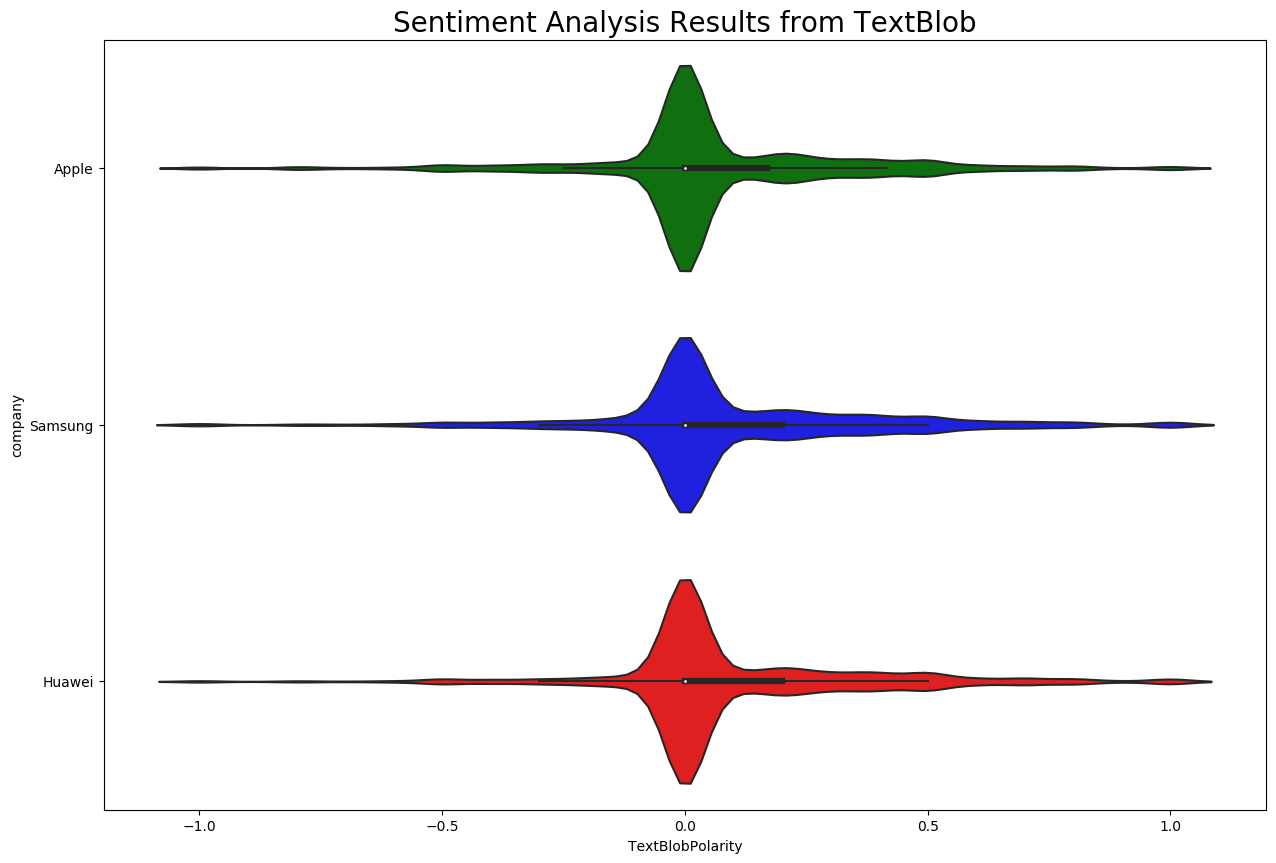

In [77]:
# plot the NLTK results for separated by each category
plt.figure(figsize=(15, 10))

# dictionary to map colors to each company
my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 
sns.violinplot(x="TextBlobPolarity", y="company", data=data, palette=my_palette)
plt.title('Sentiment Analysis Results from TextBlob', fontsize=20)
plt.show()



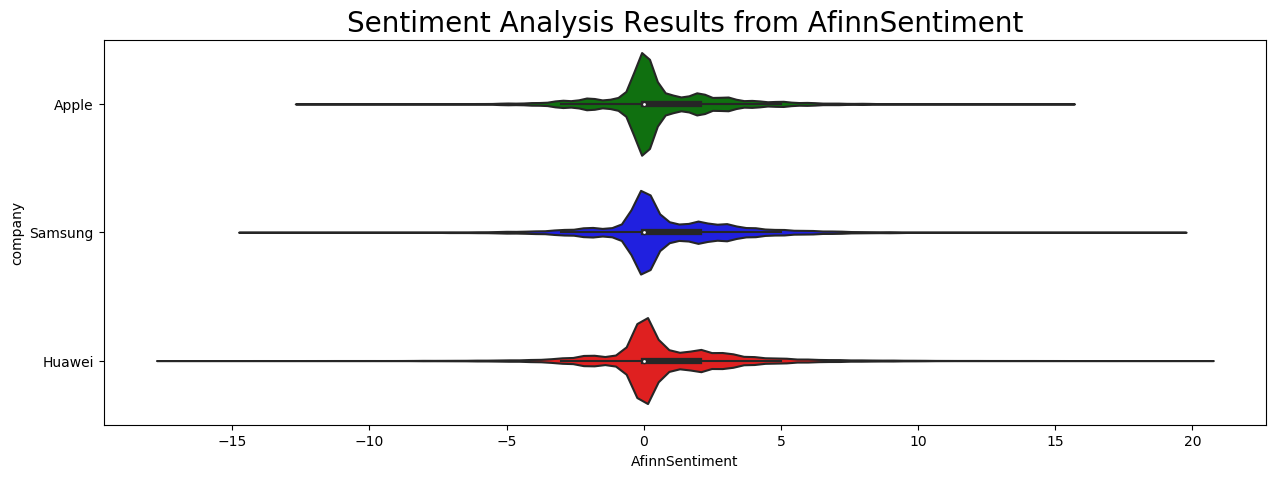

In [78]:
# plot the NLTK results for separated by each category
plt.figure(figsize=(15, 5))

# dictionary to map colors to each company
my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 
sns.violinplot(x="AfinnSentiment", y="company", data=data, palette=my_palette)
plt.title('Sentiment Analysis Results from AfinnSentiment', fontsize=20)
plt.show()

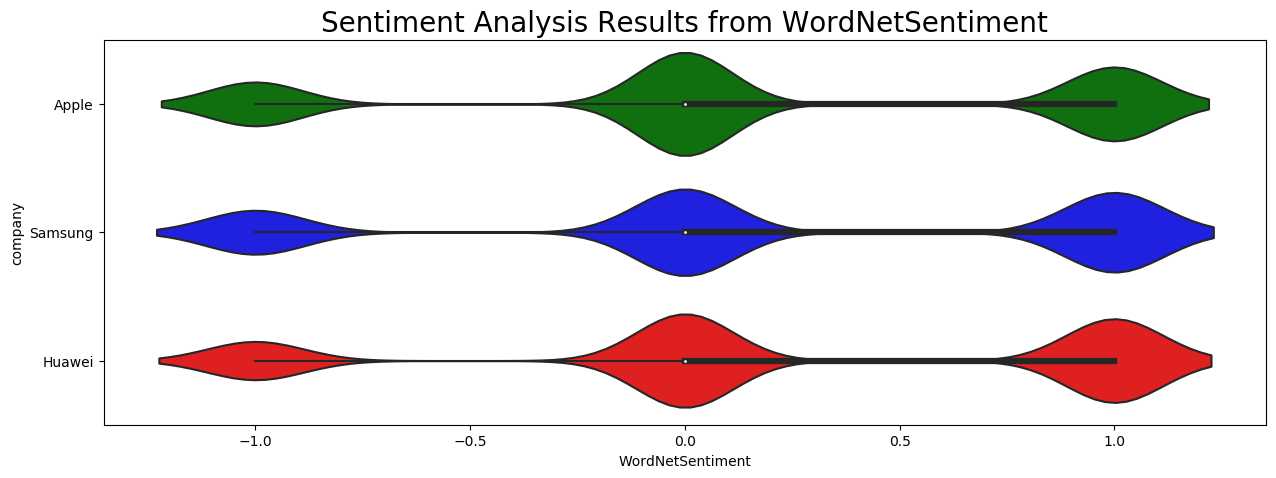

In [79]:
# plot the NLTK results for separated by each category
plt.figure(figsize=(15, 5))

# dictionary to map colors to each compamny
my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 
sns.violinplot(x="WordNetSentiment", y="company", data=data, palette=my_palette)
plt.title('Sentiment Analysis Results from WordNetSentiment', fontsize=20)
plt.show()

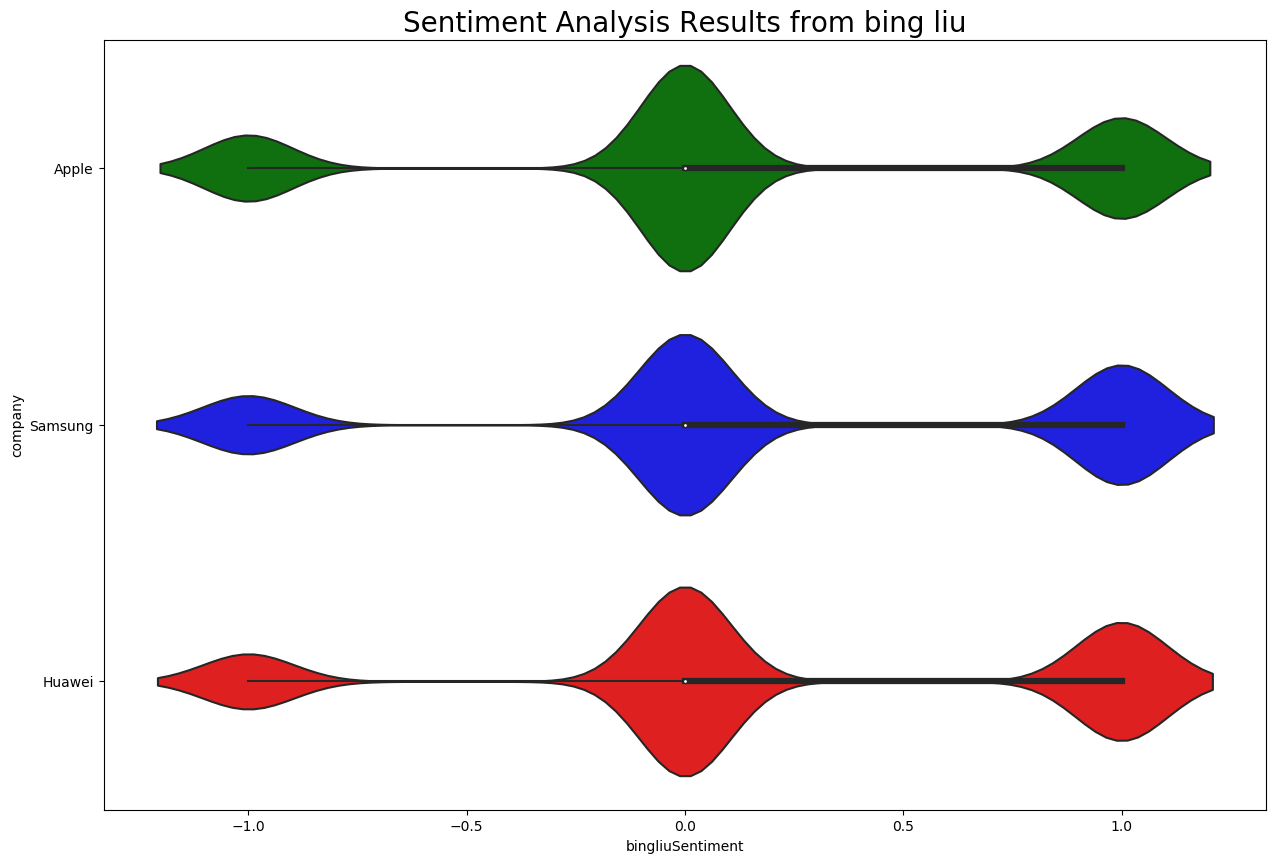

In [80]:
# plot the NLTK results for separated by each category
plt.figure(figsize=(15, 10))

# dictionary to map colors to each company
my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 
sns.violinplot(x="bingliuSentiment", y="company", data=data, palette=my_palette)
plt.title('Sentiment Analysis Results from bing liu', fontsize=20)
plt.show()

In [81]:
# Labeling the sentiments
data['sentiment_label_textblob'] = 0
data.loc[data['TextBlobPolarity']>0, 'sentiment_label_textblob'] = 1
data.loc[data['TextBlobPolarity']<0, 'sentiment_label_textblob'] = -1

In [82]:
data['sentiment_label_Afinn'] = 0
data.loc[data['AfinnSentiment']>0, 'sentiment_label_Afinn'] = 1
data.loc[data['AfinnSentiment']<0, 'sentiment_label_Afinn'] = -1

In [83]:
data['sentiment_label_WordNet'] = 0
data.loc[data['WordNetSentiment']>0, 'sentiment_label_WordNet'] = 1
data.loc[data['WordNetSentiment']<0, 'sentiment_label_WordNet'] = -1

In [84]:
data['sentiment_label_bingliu'] = 0
data.loc[data['bingliuSentiment']>0, 'sentiment_label_bingliu'] = 1
data.loc[data['bingliuSentiment']<0, 'sentiment_label_bingliu'] = -1

In [85]:
data.to_csv('data/raw_data.csv', index=False)
data = pd.read_csv('data/raw_data.csv')
data

timestamp                                               text  \
0      2019-12-25 23:45:56  anyone seriously believe apple timcook capable...   
1      2019-12-25 23:45:50                   phone last night half apple hell   
2      2019-12-25 23:44:51        dear apple never thought miss piece garbage   
3      2019-12-25 23:42:55                                        need season   
4      2019-12-25 23:42:53                                              apple   
...                    ...                                                ...   
34596  2019-12-18 10:36:56                                            twitter   
34597  2019-12-18 07:10:33                                     review twitter   
34598  2019-12-18 05:59:15                                type surface galaxy   
34599  2019-12-17 23:47:06  write consume content thinking love think futu...   
34600  2019-12-17 22:23:51  advise year happy powerful light always opinio...   

                                                hashtags  likes  retweets  \
0                                                     []      1         0   
1                                                     []      0         0   
2                                                     []      0         0   
3                                                     []      0         0   
4                                                     []      0         0   
...                                                  ...    ...       ...   
34596                                                 []      3         0   
34597  ['huaweimatebook', 'matebookD', 'HuaweiReview'...      0         0   
34598                                                 []      0         0   
34599                                                 []      0         0   
34600                                                 []      1         0   

       replies company                                     tokenizedWords  \
0            0   Apple  ['anyone', 'seriously', 'believe', 'apple', 't...   
1            1   Apple  ['phone', 'last', 'night', 'half', 'apple', 'h...   
2            0   Apple  ['dear', 'apple', 'never', 'thought', 'miss', ...   
3            0   Apple                                 ['need', 'season']   
4            0   Apple                                          ['apple']   
...        ...     ...                                                ...   
34596        0  Huawei                                        ['twitter']   
34597        0  Huawei                              ['review', 'twitter']   
34598        0  Huawei                      ['type', 'surface', 'galaxy']   
34599        1  Huawei  ['write', 'consume', 'content', 'thinking', 'l...   
34600        0  Huawei  ['advise', 'year', 'happy', 'powerful', 'light...   

       word_count  bingliuSentiment  WordNetSentiment  AfinnSentiment  \
0              17               1.0               1.0             1.0   
1               6              -1.0              -1.0            -4.0   
2               7              -1.0              -1.0            -1.0   
3               2               0.0               0.0             0.0   
4               1               0.0               0.0             0.0   
...           ...               ...               ...             ...   
34596           1               0.0               0.0             0.0   
34597           2               0.0               1.0             0.0   
34598           3               0.0               0.0             0.0   
34599          11               1.0               1.0             1.0   
34600           9               1.0               1.0             8.0   

       TextBlobPolarity  TextBlobSubjectivity  sentiment_label_textblob  \
0             -0.033333              0.641667                        -1   
1             -0.083333              0.116667                        -1   
2              0.000000              0.000000                         0   
3              0.

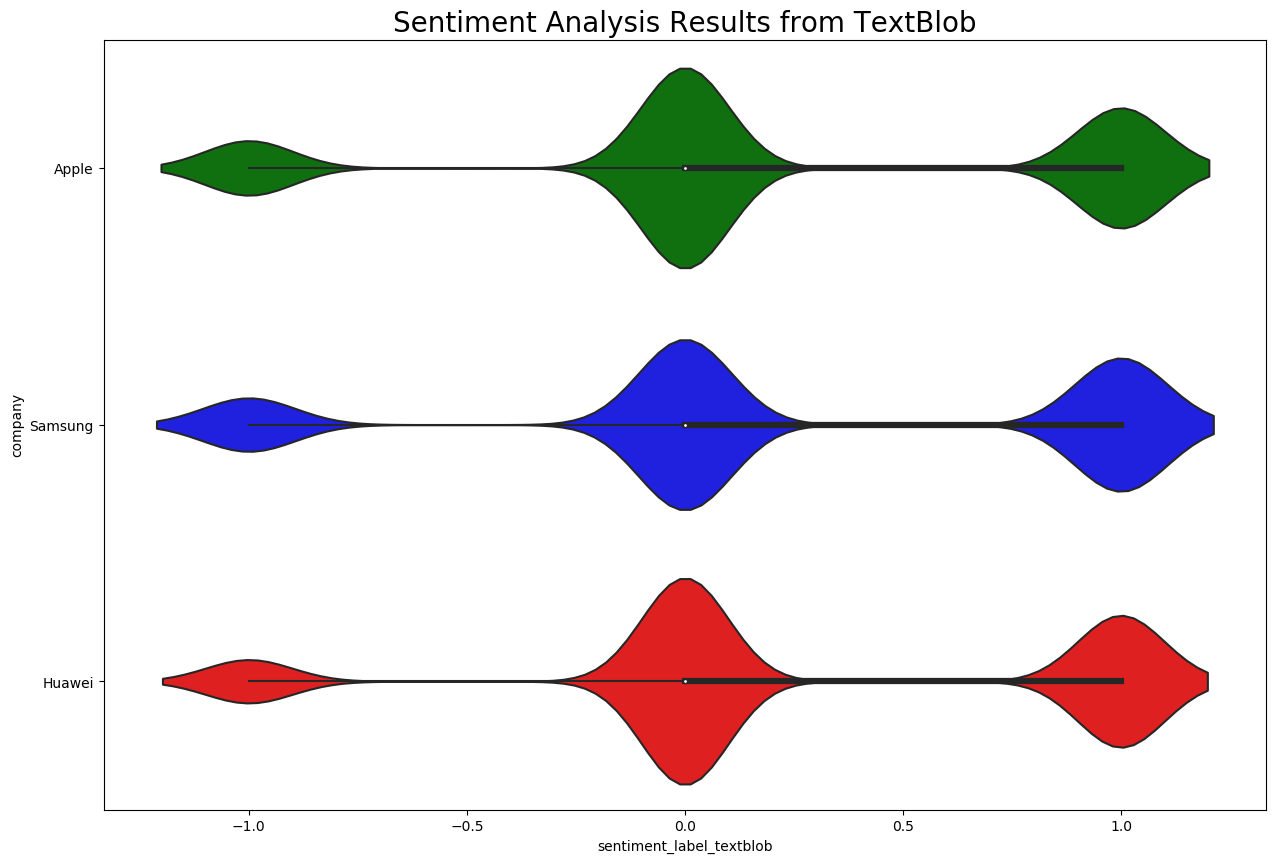

In [86]:
# plot the NLTK results for separated by each category
plt.figure(figsize=(15, 10))

# dictionary to map colors to each company
my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 
sns.violinplot(x="sentiment_label_textblob", y="company", data=data, palette=my_palette)
plt.title('Sentiment Analysis Results from TextBlob', fontsize=20)
plt.show()

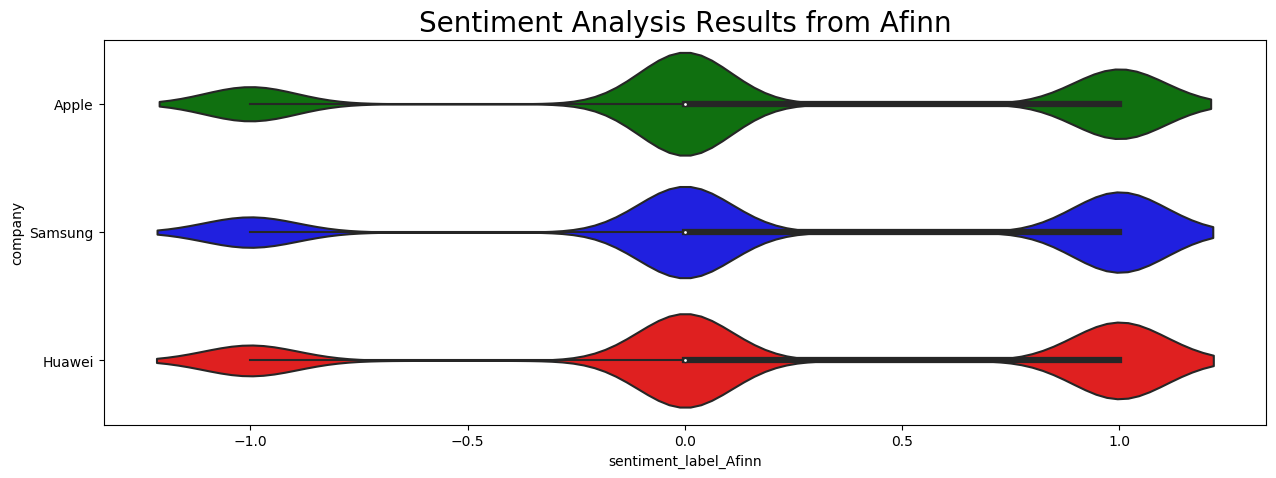

In [87]:
# plot the NLTK results for separated by each category
plt.figure(figsize=(15, 5))

# dictionary to map colors to each company
my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 
sns.violinplot(x="sentiment_label_Afinn", y="company", data=data, palette=my_palette)
plt.title('Sentiment Analysis Results from Afinn', fontsize=20)
plt.show()

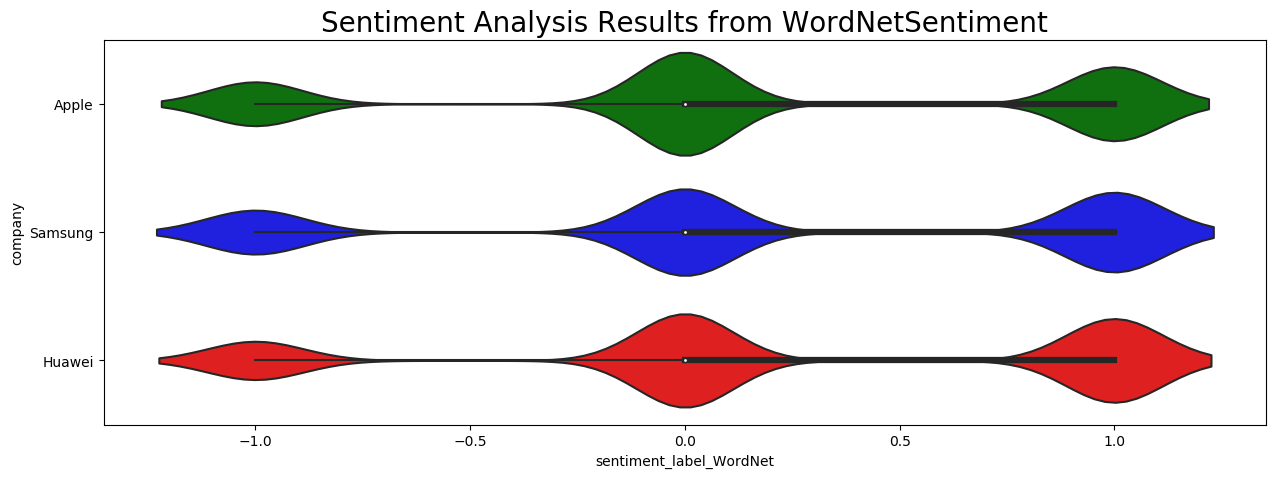

In [88]:
# plot the NLTK results for separated by each category
plt.figure(figsize=(15, 5))

# dictionary to map colors to each company
my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 
sns.violinplot(x="sentiment_label_WordNet", y="company", data=data, palette=my_palette)
plt.title('Sentiment Analysis Results from WordNetSentiment', fontsize=20)
plt.show()

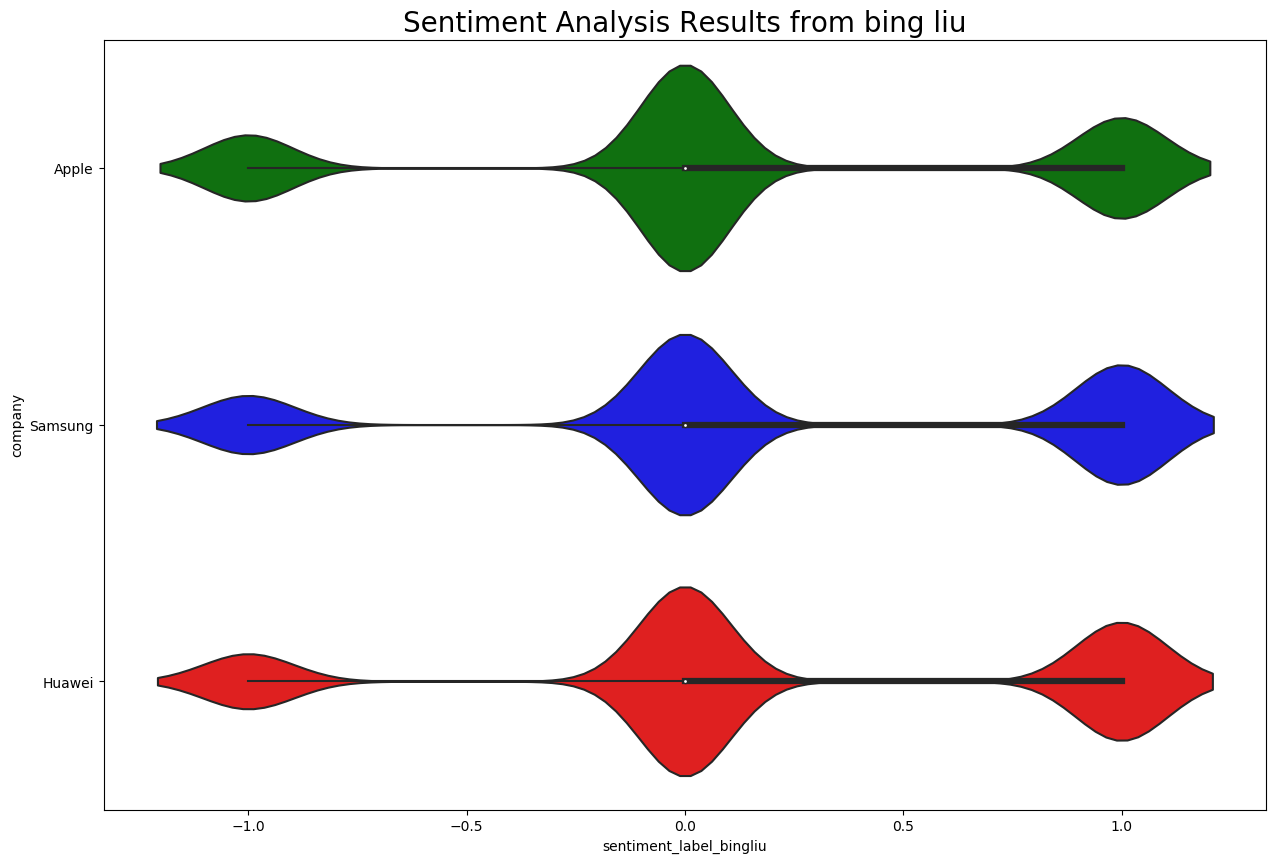

In [89]:
# plot the NLTK results for separated by each category
plt.figure(figsize=(15, 10))

# dictionary to map colors to each company
my_palette = {'Apple': 'green', 'Samsung': 'blue', 'Huawei': 'red'} 
sns.violinplot(x="sentiment_label_bingliu", y="company", data=data, palette=my_palette)
plt.title('Sentiment Analysis Results from bing liu', fontsize=20)
plt.show()

In [90]:
hists, temp = np.histogram(data['sentiment_label_textblob'], bins=3)
hists / data.shape[0]

array([0.13667235, 0.51744169, 0.34588596])

In [91]:
hists, temp = np.histogram(data['sentiment_label_Afinn'], bins=3)
hists / data.shape[0]

array([0.15641166, 0.4727898 , 0.37079853])

In [92]:
hists, temp = np.histogram(data['sentiment_label_WordNet'], bins=3)
hists / data.shape[0]

array([0.19548568, 0.43805092, 0.3664634 ])

In [93]:
hists, temp = np.histogram(data['sentiment_label_bingliu'], bins=3)
hists / data.shape[0]

array([0.16424381, 0.52700789, 0.3087483 ])

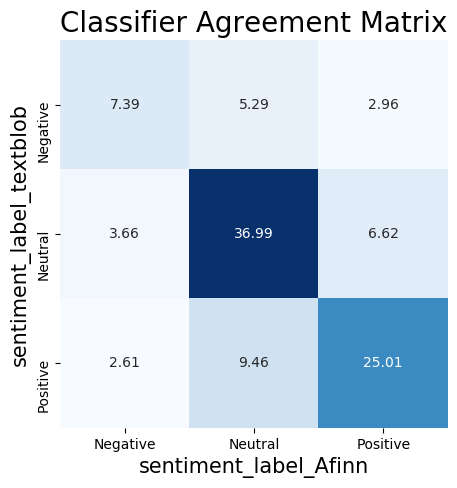

In [94]:
from sklearn.metrics import confusion_matrix
# calculate confusion matrix, gives us a normalized comparison of all classes
c = confusion_matrix(data['sentiment_label_Afinn'], data['sentiment_label_textblob'], 
                     labels=[-1, 0, 1], normalize='all') * 100

# plot confusion matrix
plt.figure(figsize=(5, 6))
ticks = ['Negative', 'Neutral', 'Positive']
sns.heatmap(c, xticklabels=ticks, yticklabels=ticks, cmap='Blues', 
            annot=True, fmt='.2f', square=True, cbar=False)
plt.xlabel('sentiment_label_Afinn', fontsize=15)
plt.ylabel('sentiment_label_textblob', fontsize=15)
plt.title('Classifier Agreement Matrix', fontsize=20)
plt.show()

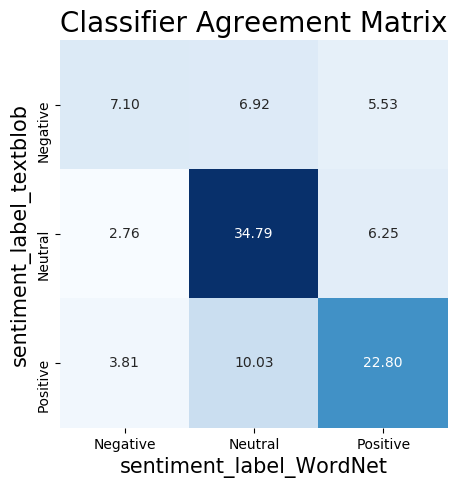

In [95]:
# calculate confusion matrix, gives us a normalized comparison of all classes
c2 = confusion_matrix(data['sentiment_label_WordNet'], data['sentiment_label_textblob'], 
                     labels=[-1, 0, 1], normalize='all') * 100

# plot confusion matrix
plt.figure(figsize=(5, 6))
ticks = ['Negative', 'Neutral', 'Positive']
sns.heatmap(c2, xticklabels=ticks, yticklabels=ticks, cmap='Blues', 
            annot=True, fmt='.2f', square=True, cbar=False)
plt.xlabel('sentiment_label_WordNet', fontsize=15)
plt.ylabel('sentiment_label_textblob', fontsize=15)
plt.title('Classifier Agreement Matrix', fontsize=20)
plt.show()

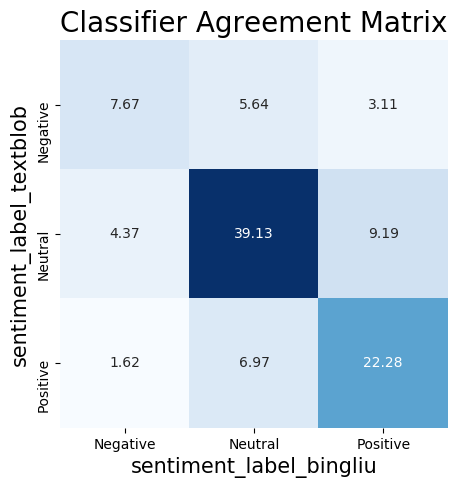

In [96]:
# calculate confusion matrix, gives us a normalized comparison of all classes
c3 = confusion_matrix(data['sentiment_label_bingliu'], data['sentiment_label_textblob'], 
                     labels=[-1, 0, 1], normalize='all') * 100

# plot confusion matrix
plt.figure(figsize=(5, 6))
ticks = ['Negative', 'Neutral', 'Positive']
sns.heatmap(c3, xticklabels=ticks, yticklabels=ticks, cmap='Blues', 
            annot=True, fmt='.2f', square=True, cbar=False)
plt.xlabel('sentiment_label_bingliu', fontsize=15)
plt.ylabel('sentiment_label_textblob', fontsize=15)
plt.title('Classifier Agreement Matrix', fontsize=20)
plt.show()

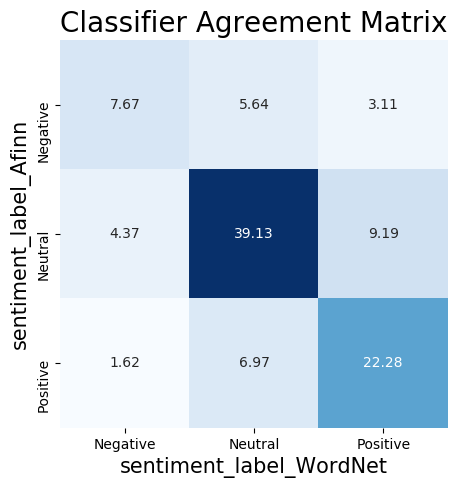

In [97]:
# calculate confusion matrix, gives us a normalized comparison of all classes
c4 = confusion_matrix(data['sentiment_label_WordNet'], data['sentiment_label_Afinn'], 
                     labels=[-1, 0, 1], normalize='all') * 100

# plot confusion matrix
plt.figure(figsize=(5, 6))
ticks = ['Negative', 'Neutral', 'Positive']
sns.heatmap(c3, xticklabels=ticks, yticklabels=ticks, cmap='Blues', 
            annot=True, fmt='.2f', square=True, cbar=False)
plt.xlabel('sentiment_label_WordNet', fontsize=15)
plt.ylabel('sentiment_label_Afinn', fontsize=15)
plt.title('Classifier Agreement Matrix', fontsize=20)
plt.show()

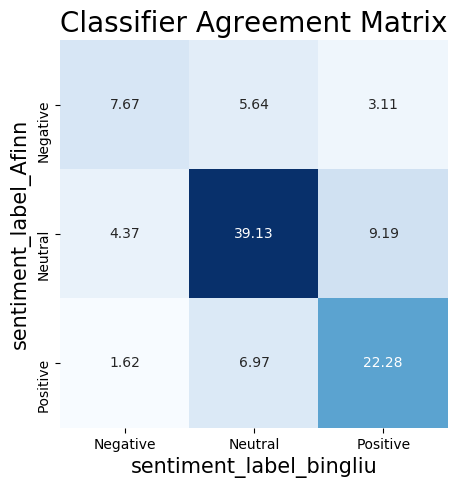

In [98]:
# calculate confusion matrix, gives us a normalized comparison of all classes
c4 = confusion_matrix(data['sentiment_label_bingliu'], data['sentiment_label_Afinn'], 
                     labels=[-1, 0, 1], normalize='all') * 100

# plot confusion matrix
plt.figure(figsize=(5, 6))
ticks = ['Negative', 'Neutral', 'Positive']
sns.heatmap(c3, xticklabels=ticks, yticklabels=ticks, cmap='Blues', 
            annot=True, fmt='.2f', square=True, cbar=False)
plt.xlabel('sentiment_label_bingliu', fontsize=15)
plt.ylabel('sentiment_label_Afinn', fontsize=15)
plt.title('Classifier Agreement Matrix', fontsize=20)
plt.show()

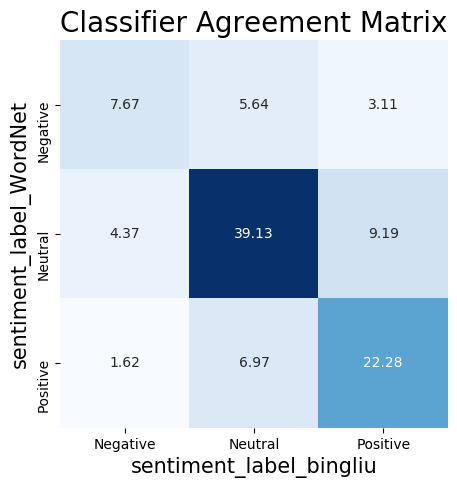

In [99]:
# calculate confusion matrix, gives us a normalized comparison of all classes
c4 = confusion_matrix(data['sentiment_label_bingliu'], data['sentiment_label_WordNet'], 
                     labels=[-1, 0, 1], normalize='all') * 100

# plot confusion matrix
plt.figure(figsize=(5, 6))
ticks = ['Negative', 'Neutral', 'Positive']
sns.heatmap(c3, xticklabels=ticks, yticklabels=ticks, cmap='Blues', 
            annot=True, fmt='.2f', square=True, cbar=False)
plt.xlabel('sentiment_label_bingliu', fontsize=15)
plt.ylabel('sentiment_label_WordNet', fontsize=15)
plt.title('Classifier Agreement Matrix', fontsize=20)
plt.show()

In [100]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return '-1'
    elif score == 0:
      return '0'
    else:
      return '1'

In [101]:
data['analysis'] = None 
data['sentiment_label'] = None
data['analysis'] = data['sentiment_label_textblob'].values + data['sentiment_label_Afinn'].values + data['sentiment_label_WordNet'].values + data['sentiment_label_bingliu'].values
data['sentiment_label'] = data['analysis'].apply(getAnalysis)
data

timestamp                                               text  \
0      2019-12-25 23:45:56  anyone seriously believe apple timcook capable...   
1      2019-12-25 23:45:50                   phone last night half apple hell   
2      2019-12-25 23:44:51        dear apple never thought miss piece garbage   
3      2019-12-25 23:42:55                                        need season   
4      2019-12-25 23:42:53                                              apple   
...                    ...                                                ...   
34596  2019-12-18 10:36:56                                            twitter   
34597  2019-12-18 07:10:33                                     review twitter   
34598  2019-12-18 05:59:15                                type surface galaxy   
34599  2019-12-17 23:47:06  write consume content thinking love think futu...   
34600  2019-12-17 22:23:51  advise year happy powerful light always opinio...   

                                                hashtags  likes  retweets  \
0                                                     []      1         0   
1                                                     []      0         0   
2                                                     []      0         0   
3                                                     []      0         0   
4                                                     []      0         0   
...                                                  ...    ...       ...   
34596                                                 []      3         0   
34597  ['huaweimatebook', 'matebookD', 'HuaweiReview'...      0         0   
34598                                                 []      0         0   
34599                                                 []      0         0   
34600                                                 []      1         0   

       replies company                                     tokenizedWords  \
0            0   Apple  ['anyone', 'seriously', 'believe', 'apple', 't...   
1            1   Apple  ['phone', 'last', 'night', 'half', 'apple', 'h...   
2            0   Apple  ['dear', 'apple', 'never', 'thought', 'miss', ...   
3            0   Apple                                 ['need', 'season']   
4            0   Apple                                          ['apple']   
...        ...     ...                                                ...   
34596        0  Huawei                                        ['twitter']   
34597        0  Huawei                              ['review', 'twitter']   
34598        0  Huawei                      ['type', 'surface', 'galaxy']   
34599        1  Huawei  ['write', 'consume', 'content', 'thinking', 'l...   
34600        0  Huawei  ['advise', 'year', 'happy', 'powerful', 'light...   

       word_count  bingliuSentiment  WordNetSentiment  AfinnSentiment  \
0              17               1.0               1.0             1.0   
1               6              -1.0              -1.0            -4.0   
2               7              -1.0              -1.0            -1.0   
3               2               0.0               0.0             0.0   
4               1               0.0               0.0             0.0   
...           ...               ...               ...             ...   
34596           1               0.0               0.0             0.0   
34597           2               0.0               1.0             0.0   
34598           3               0.0               0.0             0.0   
34599          11               1.0               1.0             1.0   
34600           9               1.0               1.0             8.0   

       TextBlobPolarity  TextBlobSubjectivity  sentiment_label_textblob  \
0             -0.033333              0.641667                        -1   
1             -0.083333              0.116667                        -1   
2              0.000000              0.000000                         0   
3              0.

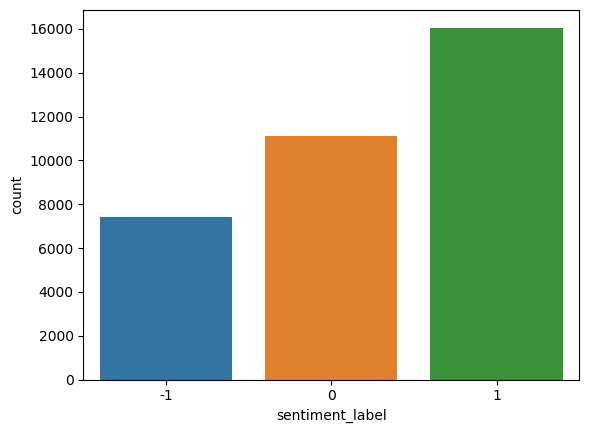

In [102]:
sns.countplot(x= 'sentiment_label',data = data)

In [103]:
# Print the percentage of neutral tweets
ptweets = data[data.sentiment_label == '0']
round( (ptweets.shape[0] / data.shape[0]) * 100 , 1)

32.2

In [104]:
# Print the percentage of positive tweets
ptweets = data[data.sentiment_label == '1']
round( (ptweets.shape[0] / data.shape[0]) * 100 , 1)

46.4

In [105]:
# Print the percentage of negative tweets
ptweets = data[data.sentiment_label == '-1']
round( (ptweets.shape[0] / data.shape[0]) * 100 , 1)

21.4

In [106]:
# Grouping the tweet's sentiment by the company
data.groupby(['sentiment_label', 'company'])['sentiment_label'].count()

sentiment_label  company
-1               Apple      2759
                 Huawei     2155
                 Samsung    2490
0                Apple      4129
                 Huawei     3513
                 Samsung    3494
1                Apple      5158
                 Huawei     5313
                 Samsung    5590
Name: sentiment_label, dtype: int64

In [107]:
# plot three separate pie cahrts of sentiment analysis results, one for each company
def plot_sentiment_pie(df, sent_label, title=None):
    counts = 100*(df.groupby([sent_label, 'company'])[sent_label].count() /
                  df.groupby(['company'])[sent_label].count())
    xs = np.array(counts).reshape(3, 3)
    
    
    plt.figure(figsize=(25, 8))
    for i, p in enumerate(['Apple', 'Huawei', 'Samsung']):    
        plt.subplot(1, 3, i+1)
        plt.pie(xs[:,i], explode=[0.03, 0.03, 0.03], labels=['Negative', 'Neutral', 'Positive'],
                colors=['#FD5D5F', '#FEDD64', '#38BF6F'], autopct='%.1f%%', shadow=True, textprops={'fontsize': 15})
        plt.axis('equal')
        plt.title(p, fontsize=20, y=0.94)
        
    if title:
        plt.suptitle(title, fontsize=25, y=0.96)
    
    plt.subplots_adjust(wspace=0.2)
    plt.show()

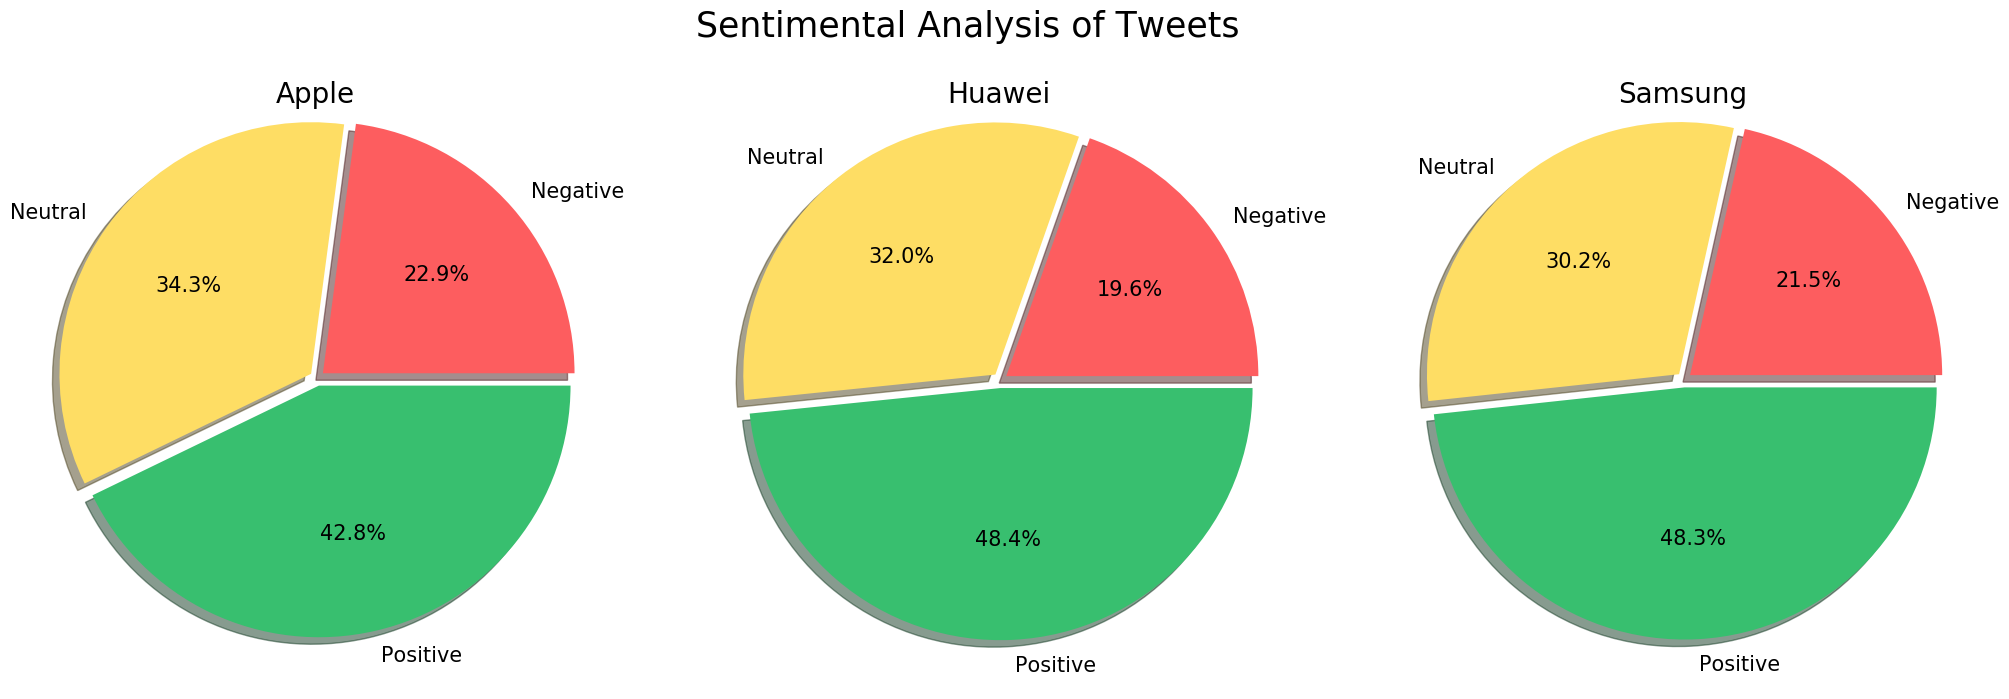

In [108]:
plot_sentiment_pie(data, 'sentiment_label', 'Sentimental Analysis of Tweets')

In [109]:
# creating a new data frame for LDA
columns=['company', 'content']
LDAdata = pd.DataFrame(columns=columns)
for i, company in enumerate(data.company.unique()):
    LDAdata.loc[i] = [company, ' '.join(data.loc[data['company'] == company, 'text'].values)]
    
LDAdata

company                                            content
0    Apple  anyone seriously believe apple timcook capable...
1  Samsung  apple think unnatural plasma last almost keep ...
2   Huawei  dice solo twitter hardware actually pretty goo...

In [110]:
# lemmatization with POS tag
def get_wordnet_pos(word):
    # map POS tag to the first character that lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# clean and tokenize the text
def tokenize(text, stem=True, lemmatize=True, min_char=3, max_char=30):
    # tokenize, remove punctuations, digits  and make lowercase
    remove_map = dict((ord(char), ' ') for char in (string.digits+string.punctuation))
    tokens = nltk.word_tokenize(text.lower().translate(remove_map))
    tokens = [item for item in tokens if ((len(item)>=min_char)&(len(item)<=max_char))]

    # lemmatization
    if lemmatize:
        tokens = [WordNetLemmatizer().lemmatize(item, get_wordnet_pos(item)) for item in tokens]
    # stemming
    if stem:
        tokens = [PorterStemmer().stem(item) for item in tokens]

    return tokens

# vectorize text to either tfidf or bow
def vectorize(doc_list, method='tfidf', stem=True, lemmatize=True, **kwargs):
    # words that don't have much value and should not be included in the vectorization
    Additional_stop_words = []
    stop_words = text.ENGLISH_STOP_WORDS.union(Additional_stop_words)
    
    if method=='tfidf':
        vectorizer = TfidfVectorizer(tokenizer=lambda text: tokenize(text, stem=stem, lemmatize=lemmatize),
                                     stop_words=stop_words, **kwargs)
    
    # for simplicity I assume if not "tfidf", method is "bow" or "tf"
    else:
        vectorizer = CountVectorizer(tokenizer=lambda text: tokenize(text, stem=stem, lemmatize=lemmatize),
                                     stop_words=stop_words, **kwargs)
    
    vect = vectorizer.fit_transform(doc_list)
    
    return vect, vectorizer

In [111]:
# print LDA results
def print_top_words(model, feature_names, n_top_words=20):
    print('Topics in LDA model:')
    for topic_idx, topic in enumerate(model.components_):
        message = 'Topic #%d: ' % topic_idx
        message += ' '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

    
# fit LDA
def lda_fit(docs_list, method='tf', n_topics=10, n_features=None, max_df=0.35, min_df=10):
    print('Vectorizing ...')
    t = time()
    vect, vectorizer = vectorize(docs_list, method=method, stem=False, 
                                 max_df=max_df, min_df=min_df, max_features=n_features)
    print('Done in %i Seconds' %(time()-t))
    print()

    print('Fitting LDA model ...')
    lda = LatentDirichletAllocation(n_components=n_topics,
                                    max_iter=5,
                                    learning_method='online', # we have a large dataset, online is faster than batch
                                    learning_offset=50.,
                                    random_state=0) # to ensure reproducabality of the results
    t = time()
    lda.fit(vect)
    print('Done in %i Seconds' %(time()-t))
    
    return lda, vectorizer


# predict using fitted lda
def lda_predict(docs_list, vectorizer):
    print('Vectorizing ...')
    t = time()
    vect = vectorizer.transform(docs_list)
    print('Done in %i Seconds' %(time()-t))
    print()

    print('Transforming by LDA model ...')
    t = time()
    # Create Document — Topic Matrix
    lda_output = lda.transform(vect)
    # Get dominant topic for each document
    dominant_topic_list = np.argmax(lda_output, axis=1)
    print('Done in %i Seconds' %(time()-t))

    return dominant_topic_list

In [112]:
# fit lda and vectorizer on the entire corpous 
lda, vectorizer = lda_fit(data['text'], method='tf', n_topics=10, n_features=1000, max_df=.5, min_df=.01)
# print lda topic results
print_top_words(lda, feature_names=vectorizer.get_feature_names(), n_top_words=12)

Vectorizing ...


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Done in 97 Seconds

Fitting LDA model ...
Done in 11 Seconds
Topics in LDA model:
Topic #0: like time know want help really screen free apple work money battery
Topic #1: twitter status news come money apple like help video today para thank
Topic #2: make technology support mobile stop apple news update money product thank china
Topic #3: good tech great year note smart apple plus news battery product come
Topic #4: need watch camera send apple like video update battery twitter money thank
Topic #5: galaxy people android think world right tell apple news plus money come
Topic #6: work love update best service device customer try issue product battery thank
Topic #7: apple thank para plus video today battery product phone twitter come like
Topic #8: phone china look say wait like store apple update come money battery
Topic #9: company thanks apple twitter work product today world come china help money



In [115]:
# # predict topic of each sentence using lda
data['topic'] = lda_predict(data['text'], vectorizer)

data.to_csv('data/topics_data.csv', index=False)


Vectorizing ...
Done in 98 Seconds

Transforming by LDA model ...
Done in 0 Seconds


In [116]:
# list to map topic numbers to names
topic_name_list = ['Specifications', 'News', 'Reviews', 'Reviews', 'Reviews', 
                   'Reviews', 'Service Support', 'Features', 'Reviews', 'News']

# map the topic numbers to names
data['topic_name'] = ' '
for i in data['topic'].unique():
    data.loc[data['topic']==i, 'topic_name'] = topic_name_list[i]
    
    
# check the df
print(data.shape)
data.head()

(34601, 22)


timestamp                                               text  \
0  2019-12-25 23:45:56  anyone seriously believe apple timcook capable...   
1  2019-12-25 23:45:50                   phone last night half apple hell   
2  2019-12-25 23:44:51        dear apple never thought miss piece garbage   
3  2019-12-25 23:42:55                                        need season   
4  2019-12-25 23:42:53                                              apple   

  hashtags  likes  retweets  replies company  \
0       []      1         0        0   Apple   
1       []      0         0        1   Apple   
2       []      0         0        0   Apple   
3       []      0         0        0   Apple   
4       []      0         0        0   Apple   

                                      tokenizedWords  word_count  \
0  ['anyone', 'seriously', 'believe', 'apple', 't...          17   
1  ['phone', 'last', 'night', 'half', 'apple', 'h...           6   
2  ['dear', 'apple', 'never', 'thought', 'miss', ...           7   
3                                 ['need', 'season']           2   
4                                          ['apple']           1   

   bingliuSentiment  ...  TextBlobPolarity  TextBlobSubjectivity  \
0               1.0  ...         -0.033333              0.641667   
1              -1.0  ...         -0.083333              0.116667   
2              -1.0  ...          0.000000              0.000000   
3               0.0  ...          0.000000              0.000000   
4               0.0  ...          0.000000              0.000000   

   sentiment_label_textblob  sentiment_label_Afinn  sentiment_label_WordNet  \
0                        -1                      1                        1   
1                        -1                     -1                       -1   
2                         0                     -1                       -1   
3                         0                      0                        0   
4                         0                      0                        0   

   sentiment_label_bingliu  analysis  sentiment_label  topic topic_name  
0                        1         2                1      7   Features  
1                       -1        -4               -1      8    Reviews  
2                       -1        -3               -1      7   Features  
3                        0         0                0      4    Reviews  
4                        0         0                0      7   Features  

[5 rows x 22 columns]

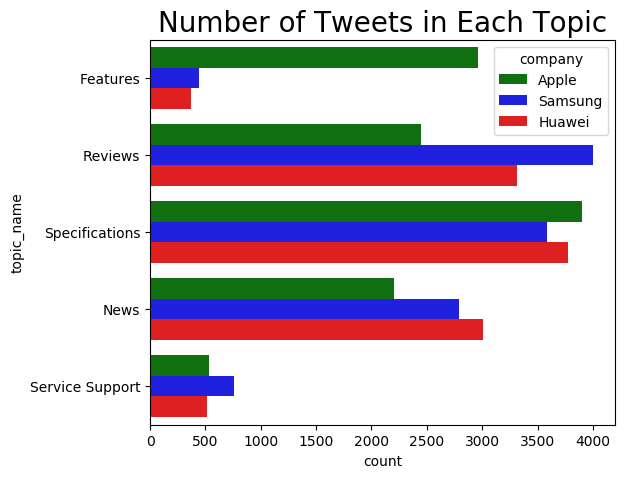

In [117]:
# plot number of sentences for each topic / company
plt.figure(figsize=(6, 5))
sns.countplot(y='topic_name', hue='company', data=data, palette=my_palette)
plt.title('Number of Tweets in Each Topic', fontsize=20)
plt.show()

In [141]:
# plot sentiment bar charts across all categories
def plot_sentiment_bars(df, sent_label, category, title=None):
    counts = 100*(df.groupby([sent_label, category])[sent_label].count() /
                  df.groupby([category])[sent_label].count())
    y = np.sort(df[category].unique())
    xs = np.array(counts).reshape(3, len(y))
    
    # positive bar
    p1 = plt.barh(y, xs[2], color='#38BF6F')
    # negative bar
    p2 = plt.barh(y, xs[0], left=xs[2], color='#FD5D5F')
    # neutral bar
    p3 = plt.barh(y, xs[1], left=xs[2]+xs[0], color='#FEDD64')

    plt.gca().invert_yaxis()
    plt.yticks(fontsize=15)
    plt.xlabel('Percentage of all sentences', fontsize=15)
    plt.legend((p1, p2, p3), ('Positive', 'Negative', 'Neutral'))
    if title:
        plt.title(title, fontsize=20)


# plot two separate sentiment bar charts, one for each company
def plot_two_sentiment_bars(df, sent_label, title=None, category='category_subcategory'):
    plt.figure(figsize=(12, 5))
    for i, p in enumerate(['Apple', 'Samsung', 'Huawei']):    
        plt.subplot(1, 3, i+1)
        plot_sentiment_bars(df.loc[df['company']==p], sent_label, category=category, title=p)
        if i!=2:
            plt.legend().set_visible(False)
        if i!= 0:
            plt.yticks([])
 

    if title:
        plt.suptitle(title, fontsize=25, y=1.05)
    
    plt.subplots_adjust(wspace=0.2)
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


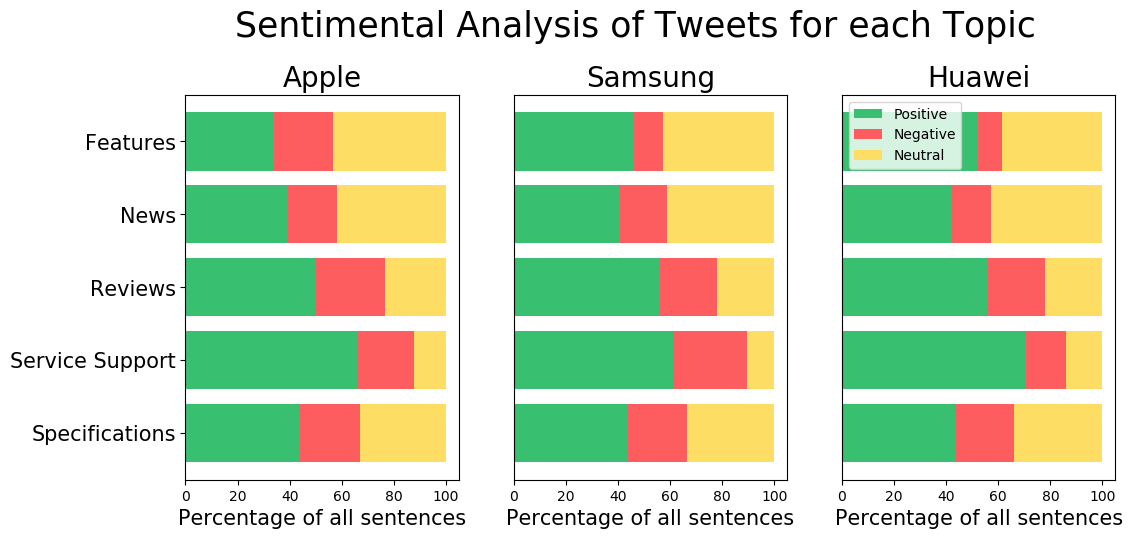

In [142]:
# plot topic sentiments
plot_two_sentiment_bars(data, 'sentiment_label', 
                        title='Sentimental Analysis of Tweets for each Topic', category='topic_name')

In [120]:
# generate a matrix containing similarity score between all docs in the doc_list
def cos_similarity(doc_list):
    vect, _ = vectorize(doc_list, method='tfidf', stem=True, lemmatize=False)
    return (vect * vect.T).A

# calculate similarity score between two texts
def score_similarity(text1, text2):
    return cos_similarity([text1, text2])[0,1]

In [121]:
# comments
# create a document for each topic by concatinating all its sentences
def get_topic_sentences(topic_df):
    top_topic_df = most_commons(topic_df, 'topic_name')

    sentences_list = [str(i) for i in range(top_topic_df.shape[0])]
    for i, topic in enumerate(top_topic_df['topic_name'].values):
        inds = topic_df.loc[topic_df['topic_name']==topic].index
        sentences_list[i] = ' '.join(data.loc[inds, 'text'])

    top_topic_df['sentences'] = sentences_list

    return top_topic_df


# measure the similarity of documents (sentences) for each topic
def get_topic_similarity(topic_df):
    t = time()
    
    top_topic_df = get_topic_sentences(topic_df)
    print('Calculating the similarity between topics ...')
    sim_matrix = cos_similarity(top_topic_df['sentences'])
    
    print('Done in %i Seconds' %(time()-t))
            
    return top_topic_df[['topic_name', 'frequency']], sim_matrix


# get topics' sentences and their similarities for each president separately
def get_three_topic_similarity(topic_df):
    top_topic_df = {'Apple': None,
                    'Samsung': None,
                    'Huawei': None}
    sim_matrix = {'Apple': None,
                  'Samsung': None,
                 'Huawei': None}
    for i, p in enumerate(['Apple', 'Samsung', 'Huawei']):
        print('Calculating for %s ...' %p)
        temp_topic_df = topic_df.loc[topic_df['company']==p]
        top_topic_df[p], sim_matrix[p] = get_topic_similarity(temp_topic_df)
    
    return top_topic_df, sim_matrix

In [122]:
# this takes some time, but less than 5 min, please be patient
top_topic_df, sim_matrix = get_three_topic_similarity(data)

Calculating for Apple ...
Calculating the similarity between topics ...


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_

Done in 2 Seconds
Calculating for Samsung ...
Calculating the similarity between topics ...


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_

Done in 2 Seconds
Calculating for Huawei ...
Calculating the similarity between topics ...


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_

Done in 1 Seconds


In [123]:
# comments
import networkx as nx
# plot a word network, nodes: top entities, edges: similarity scores
def plot_word_net(top_ent_df, sim_matrix, node_color, node_size_scaler=1, cut_off=0.4, title=None, cl_name='entity'):
    nodes = top_ent_df[cl_name].values
    edg_list = []
    weight_list = np.array([])
    n = len(nodes)
    for i in range(n-1):
        for j in range(i+1, n):
            edg_list.append([nodes[i], nodes[j]])
            weight_list = np.append(weight_list, sim_matrix[i,j])

    G = nx.from_edgelist(edg_list)
    weight_list[weight_list<cut_off] = 0

    nx.draw(G, pos=nx.spring_layout(G, k=1, iterations=10000, seed=0), 
            node_size=top_ent_df['frequency'].values*node_size_scaler, width=weight_list*2, font_size = 15,
            font_weight='bold', node_color=node_color, edge_color='black', with_labels=True)

    plt.axis('equal')
    
    if title:
        plt.title(title, fontsize=25, y=1.0)
    

# plot one word network for each president separately
def plot_three_word_net(top_ent_df, sim_matrix, node_size_scaler=1, cut_off=0.4, title=None, cl_name='entity'):
    my_color_map = ['#629fff', '#F0787A','#F0687A']
    plt.figure(figsize=(20, 10))
    for i, p in enumerate(['Apple', 'Samsung', 'Huawei']):
        plt.subplot(1, 3, i+1)
        plot_word_net(top_ent_df[p], sim_matrix[p], node_color=my_color_map[i], 
                      node_size_scaler=node_size_scaler, cut_off=cut_off, title=p, cl_name=cl_name)

    if title:
        plt.suptitle(title, fontsize=30, y=1.0)
    
    plt.subplots_adjust(wspace=0.1)
    plt.show()

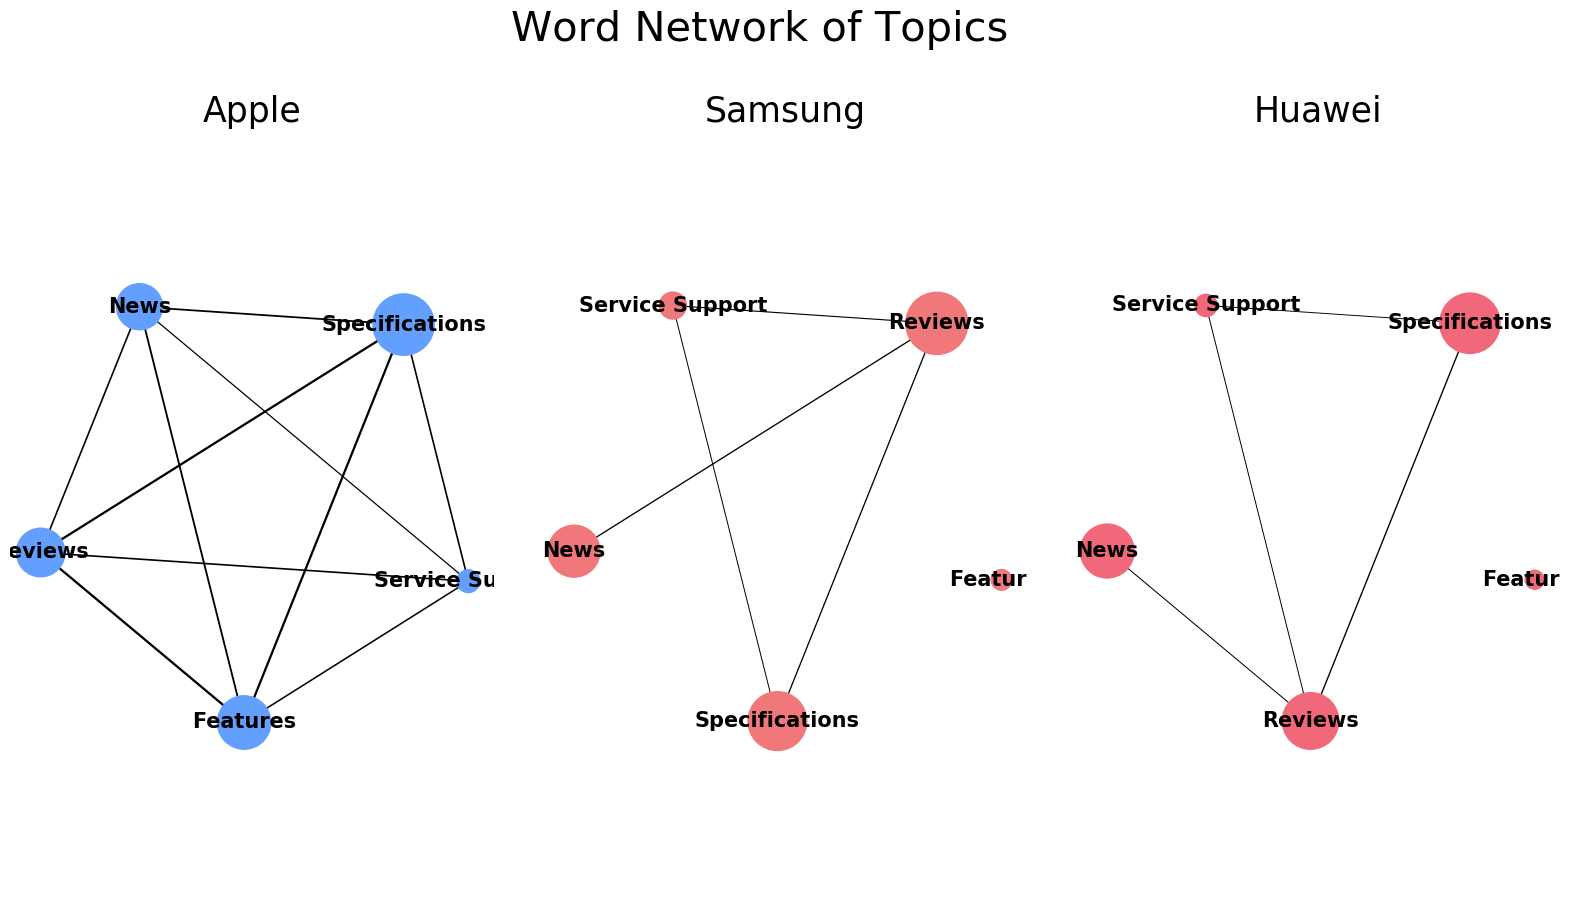

In [134]:
plot_three_word_net(top_topic_df, sim_matrix, node_size_scaler=.5, cut_off=0.30, 
                  title='Word Network of Topics', cl_name='topic_name')

In [149]:
data.text[30628]

'nice need view post china free promote reach rest world reciprocity'